In [58]:
import pandas as pd
import glob
import os
import numpy as np
import pickle
import statistics
import community
import matplotlib as mlp
# mlp.use("Qt5Agg")
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

import analysis as an
import pandas as pd


import numpy as np
import seaborn as sns

from scipy import stats 
import scipy
import pprint as pp

In [59]:
def zscore(col):
    col_z = (col - col.mean())/col.std(ddof=0)
    return(col_z)

In [92]:
p='/Users/gracer/Google Drive/HCP/HCP_graph/1200/'
atlas=pd.read_csv(os.path.join(p,'brains','atlas.csv'), sep=',')


In [60]:
labels = pd.read_csv('/Users/gracer/Google Drive/HCP/HCP_graph/1200/datasets/tmp/mod_labels.csv', sep=',')

In [61]:
labels

Index          label    Unnamed: 2        area     IC
0      73   R_Cerebellum  R_Cerebellum  Cerebellum  IC_73
1      59     R_Amygdala    R_Amygdala    Amygdala  IC_59
2      44  R_Auditory_18      R_A4_ROI    Auditory  IC_44
3      70      BrainStem     BrainStem   BrainStem  IC_70
4      79      BrainStem     BrainStem   BrainStem  IC_79
..    ...            ...           ...         ...    ...
95     29    R_Visual_29     R_MST_ROI      Visual  IC_29
96     31    R_Visual_28      R_V3_ROI      Visual  IC_31
97     38    R_Visual_37      R_V2_ROI      Visual  IC_38
98     53            NaN           NaN         NaN  IC_53
99     60            NaN           NaN         NaN  IC_60

[100 rows x 5 columns]

In [62]:
basepath='/Users/gracer/Google Drive/HCP/HCP_graph/1200/datasets/'
latest_file=an.find_latest(os.path.join(basepath,'tmp'),'6_*')
submod_dict=an.onetoughjar(latest_file)

/Users/gracer/Google Drive/HCP/HCP_graph/1200/datasets/tmp/6_submod_dict_08-31-2020_10-01-19


In [63]:
submod_dict['no'][1]

centrality  clustering        PC  modules   zDegree  sub_modules  \
1     0.002974    0.746860  0.541496        1 -1.246509            0   
6     0.005565    0.633469  0.546215        1 -1.246509            1   
11    0.003908    0.691489  0.575973        1 -1.246509            0   
13    0.005088    0.569231  0.540729        1 -1.246509            1   
23    0.002822    0.685897  0.354859        1 -1.246509            1   
32    0.002888    0.673635  0.419089        1 -1.246509            1   
39    0.004589    0.592443  0.533393        1 -1.246509            1   
45    0.004380    0.728620  0.550791        1 -1.246509            2   
47    0.003314    0.735150  0.389502        1 -1.246509            0   
49    0.004855    0.703279  0.549916        1 -1.246509            3   
50    0.003781    0.732905  0.535269        1 -1.246509            4   
51    0.004821    0.708091  0.500370        1 -1.246509            5   
52    0.004680    0.700544  0.598111        1 -1.246509            2   
53    0.003748    0.725714  0.550619        1 -1.246509            2   
54    0.004077    0.705800  0.589966        1 -1.246509            6   
55    0.006281    0.681121  0.646100        1 -1.246509            2   
56    0.004908    0.704372  0.561740        1 -1.246509            7   
58    0.004495    0.712022  0.599073        1 -1.246509            6   
60    0.004595    0.698113  0.553614        1 -1.246509            8   
65    0.007867    0.648485  0.516138        1 -1.246509            9   
73    0.005947    0.684588  0.638315        1 -1.246509            6   

    sub_zDegree   group hub   node_type  
1      0.170271  normal  no  peripheral  
6      0.384221  normal  no  peripheral  
11     0.170271  normal  no  peripheral  
13     0.384221  normal  no  peripheral  
23     0.384221  normal  no  peripheral  
32     0.384221  normal  no  peripheral  
39     0.384221  normal  no  peripheral  
45    -1.462520  normal  no  peripheral  
47     0.170271  normal  no  peripheral  
49     0.000000  normal  no  peripheral  
50     0.000000  normal  no  peripheral  
51     0.000000  normal  no  peripheral  
52    -1.462520  normal  no  peripheral  
53    -1.462520  normal  no  peripheral  
54     0.934184  normal  no  peripheral  
55    -1.462520  normal  no   connector  
56     0.000000  normal  no  peripheral  
58     0.934184  normal  no  peripheral  
60     0.000000  normal  no  peripheral  
65     0.000000  normal  no  peripheral  
73     0.934184  normal  no   connector

In [64]:
latest_file=an.find_latest(os.path.join(basepath,'tmp'),'5_*')
summary_dict=an.onetoughjar(latest_file)

/Users/gracer/Google Drive/HCP/HCP_graph/1200/datasets/tmp/5_summary_dict_12-05-2019_03-29-19


In [65]:
summary_dict['NR']['no']['graphs'].nodes(data = True)

NodeDataView({0: {'centrality': 0.0064897671177409555, 'clustering': 0.6437710437710438, 'PC': -1.0326969056632502, 'modules': 0}, 1: {'centrality': 0.002973716896117888, 'clustering': 0.7468599033816425, 'PC': -136.6879917661603, 'modules': 1}, 2: {'centrality': 0.004613266626234078, 'clustering': 0.6115384615384616, 'PC': -2.5791553363466524, 'modules': 2}, 3: {'centrality': 0.0021067150470575765, 'clustering': 0.7252252252252253, 'PC': -1655.6730753160027, 'modules': 2}, 4: {'centrality': 0.005504181704497122, 'clustering': 0.6303191489361702, 'PC': -46.63350345353303, 'modules': 3}, 5: {'centrality': 0.005469547439511589, 'clustering': 0.581081081081081, 'PC': -7.605033006414443, 'modules': 1}, 6: {'centrality': 0.005565460193765314, 'clustering': 0.6334693877551021, 'PC': -0.9582213701859268, 'modules': 1}, 7: {'centrality': 0.0031554850913130426, 'clustering': 0.6693657219973009, 'PC': -37.85627528677132, 'modules': 2}, 8: {'centrality': 0.003099278857443236, 'clustering': 0.7323

In [66]:
latest_file=an.find_latest(os.path.join(basepath,'tmp'),'7_*')
subgraph_dict=an.onetoughjar(latest_file)

/Users/gracer/Google Drive/HCP/HCP_graph/1200/datasets/tmp/7_subgraph_dict_08-31-2020_10-01-32


In [67]:
for k,v in summary_dict['NR'].items():
    # community.induced_graph(partition dictionary, graph)
     comm_graph = community.induced_graph(v['modules']['partition'], v['graphs'])
     v.update(comm_graph = comm_graph)

In [68]:
edges = {}

for group, stuff in summary_dict['NR'].items():
    print(group)
    _df = nx.to_pandas_edgelist(stuff['comm_graph'])
#     _df[(_df['source'] != _df['target']), 'weight'] == 0
    _df.loc[(_df['source'] == _df['target']), 'weight'] = 0

    _df['group']=group
    edges[group]=_df

edge_df=pd.concat(list(edges.values()))

no
ov
ob


In [69]:
edge_df['z_weight']=zscore(edge_df['weight'])

In [70]:
for k,v in summary_dict['NR'].items():
    test=edge_df[edge_df['group']==k]
    keyz = list(zip(test['source'],test['target']))
    values=test['z_weight']
    up_dict={}
    for i in range(len(keyz)):
        up_dict[keyz[i]]={'z_edge':values[i]}
    nx.set_edge_attributes(v['comm_graph'], up_dict)


In [71]:
aes_dict={'no':{},
          'ov':{},
          'ob':{}}
for group, stuff in summary_dict['NR'].items():
    print(group)
    G=stuff['comm_graph']
    aes_dict[group]=an.aesthetics(G,15000,100, 'sans-serif', 'Bold', 'z_edge', (80,50), 1)

no
8
ov
10
ob
9


no
8
8
[0.4375 1.3125 2.1875 3.0625 3.9375 4.8125 5.6875 6.5625]
ov
10
10
[0.45 1.35 2.25 3.15 4.05 4.95 5.85 6.75 7.65 8.55]
ob
9
9
[0.44444444 1.33333333 2.22222222 3.11111111 4.         4.88888889
 5.77777778 6.66666667 7.55555556]


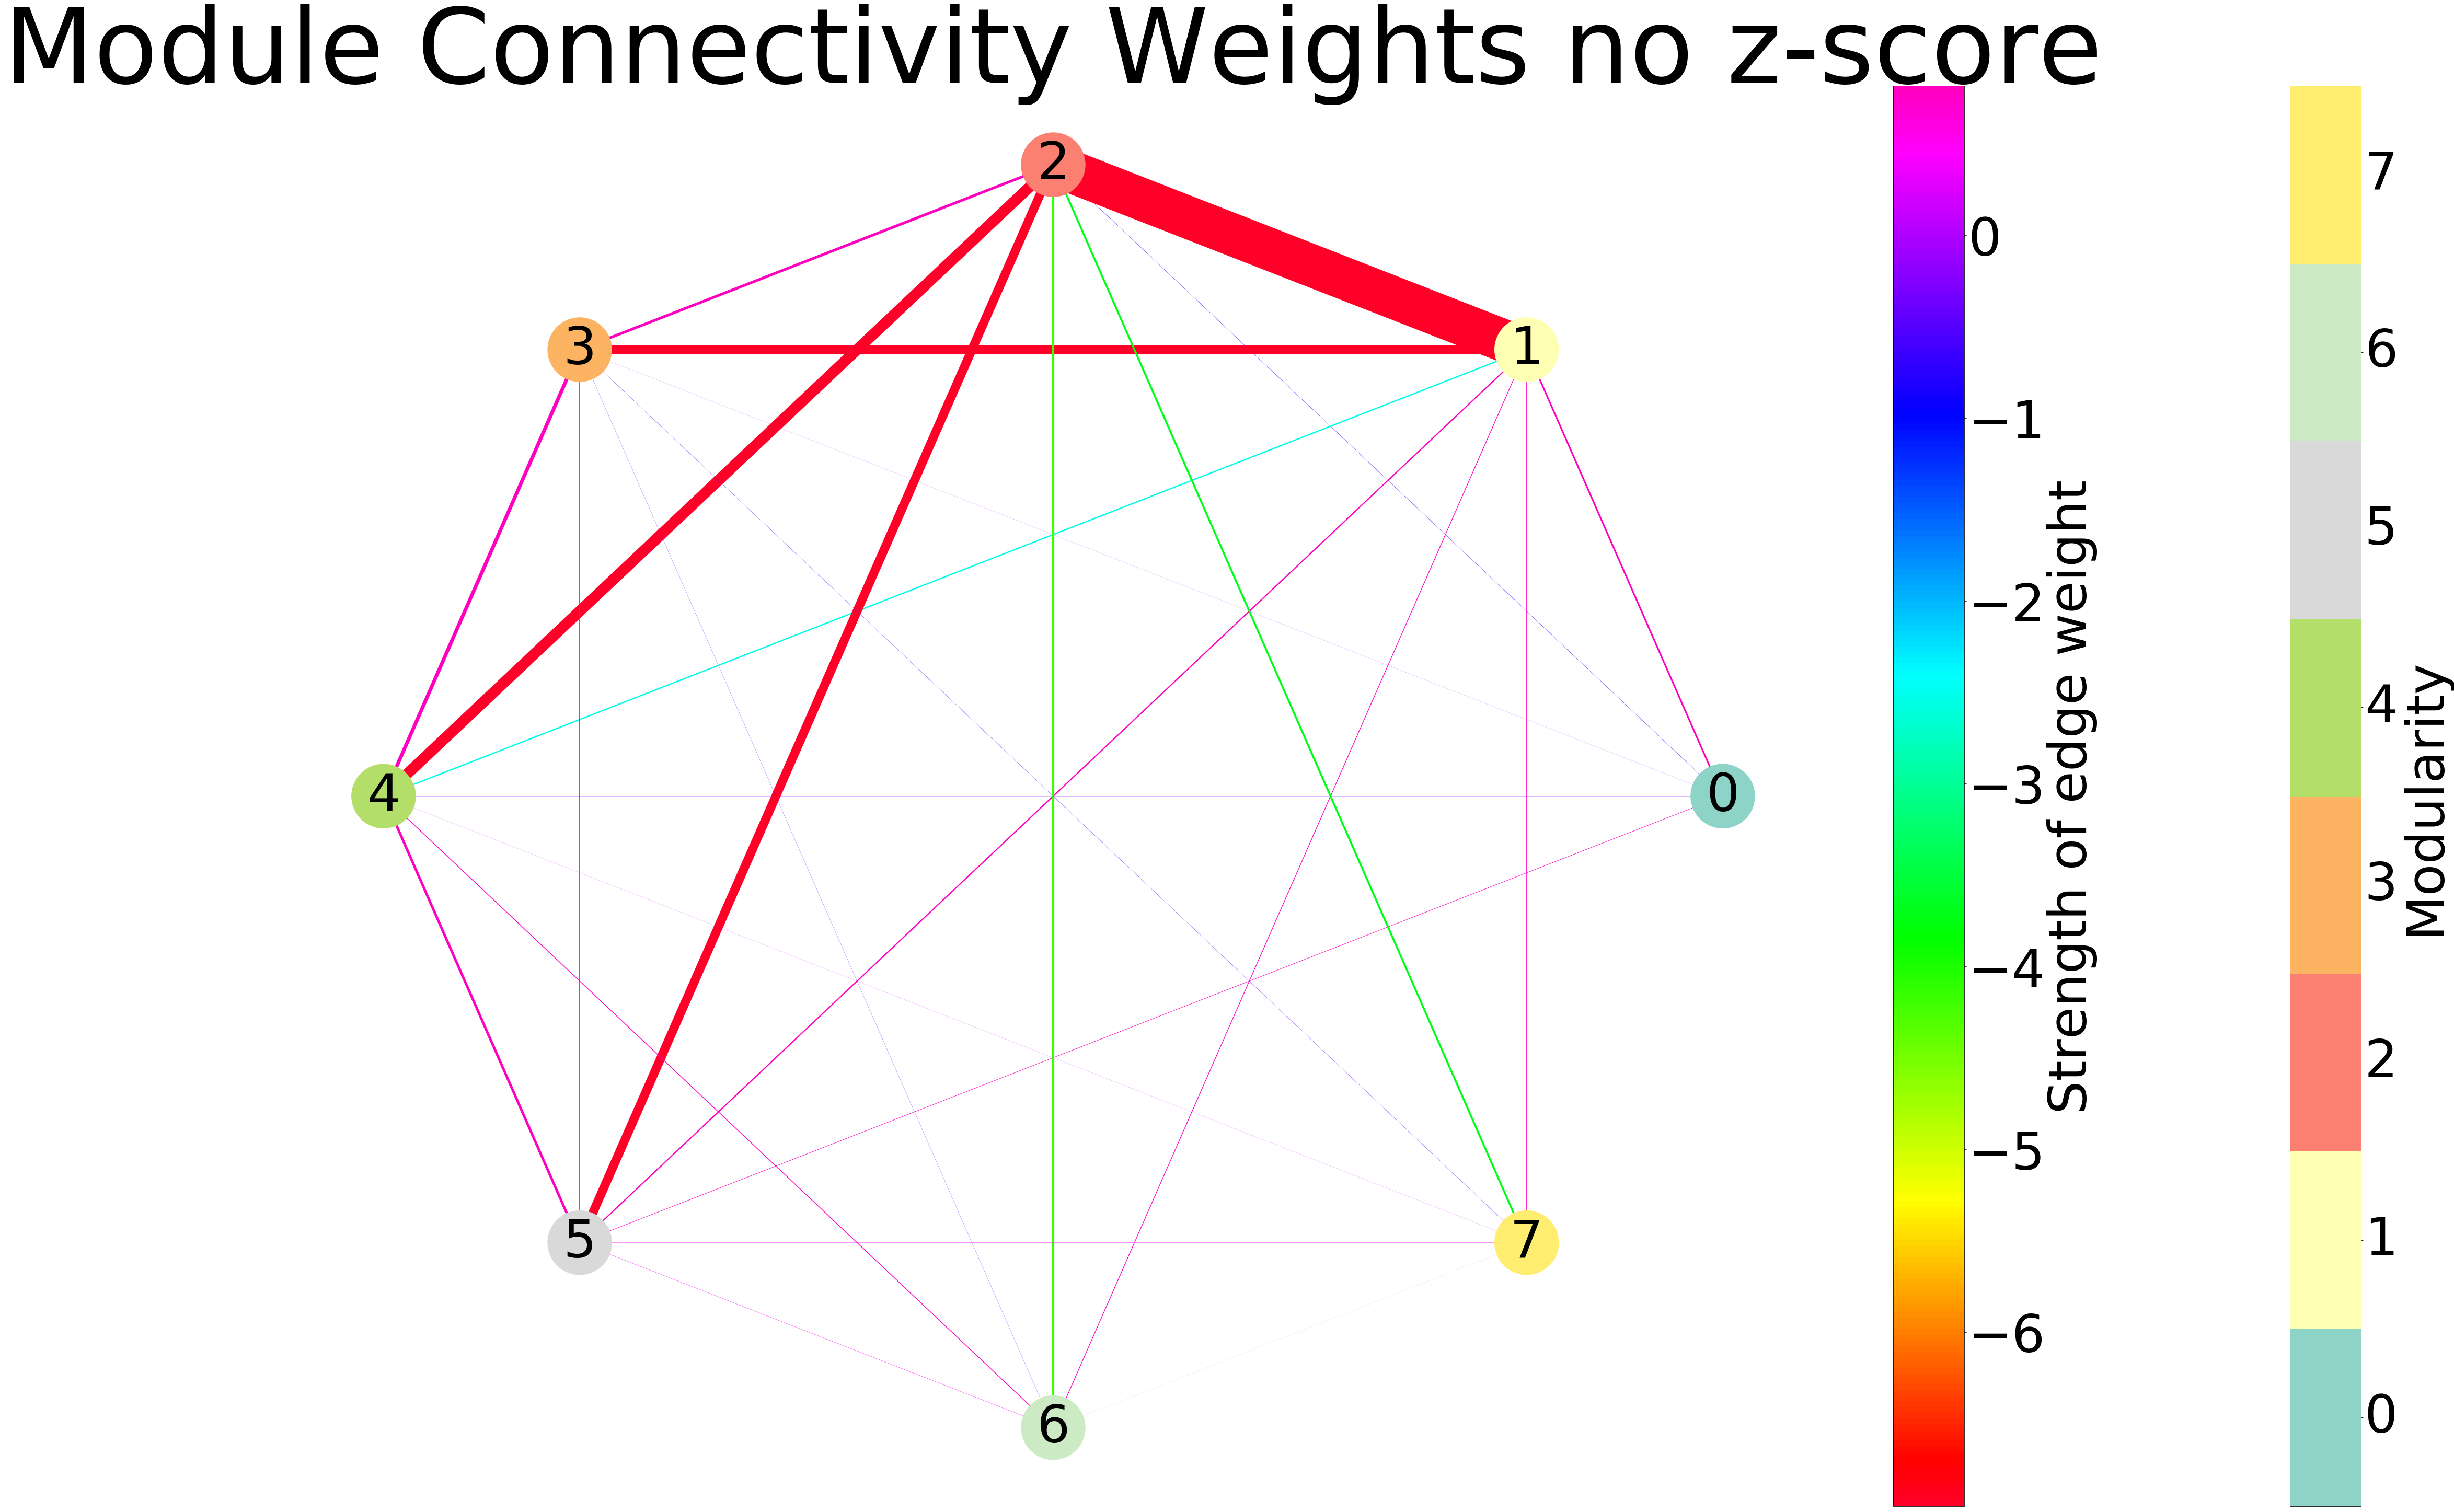

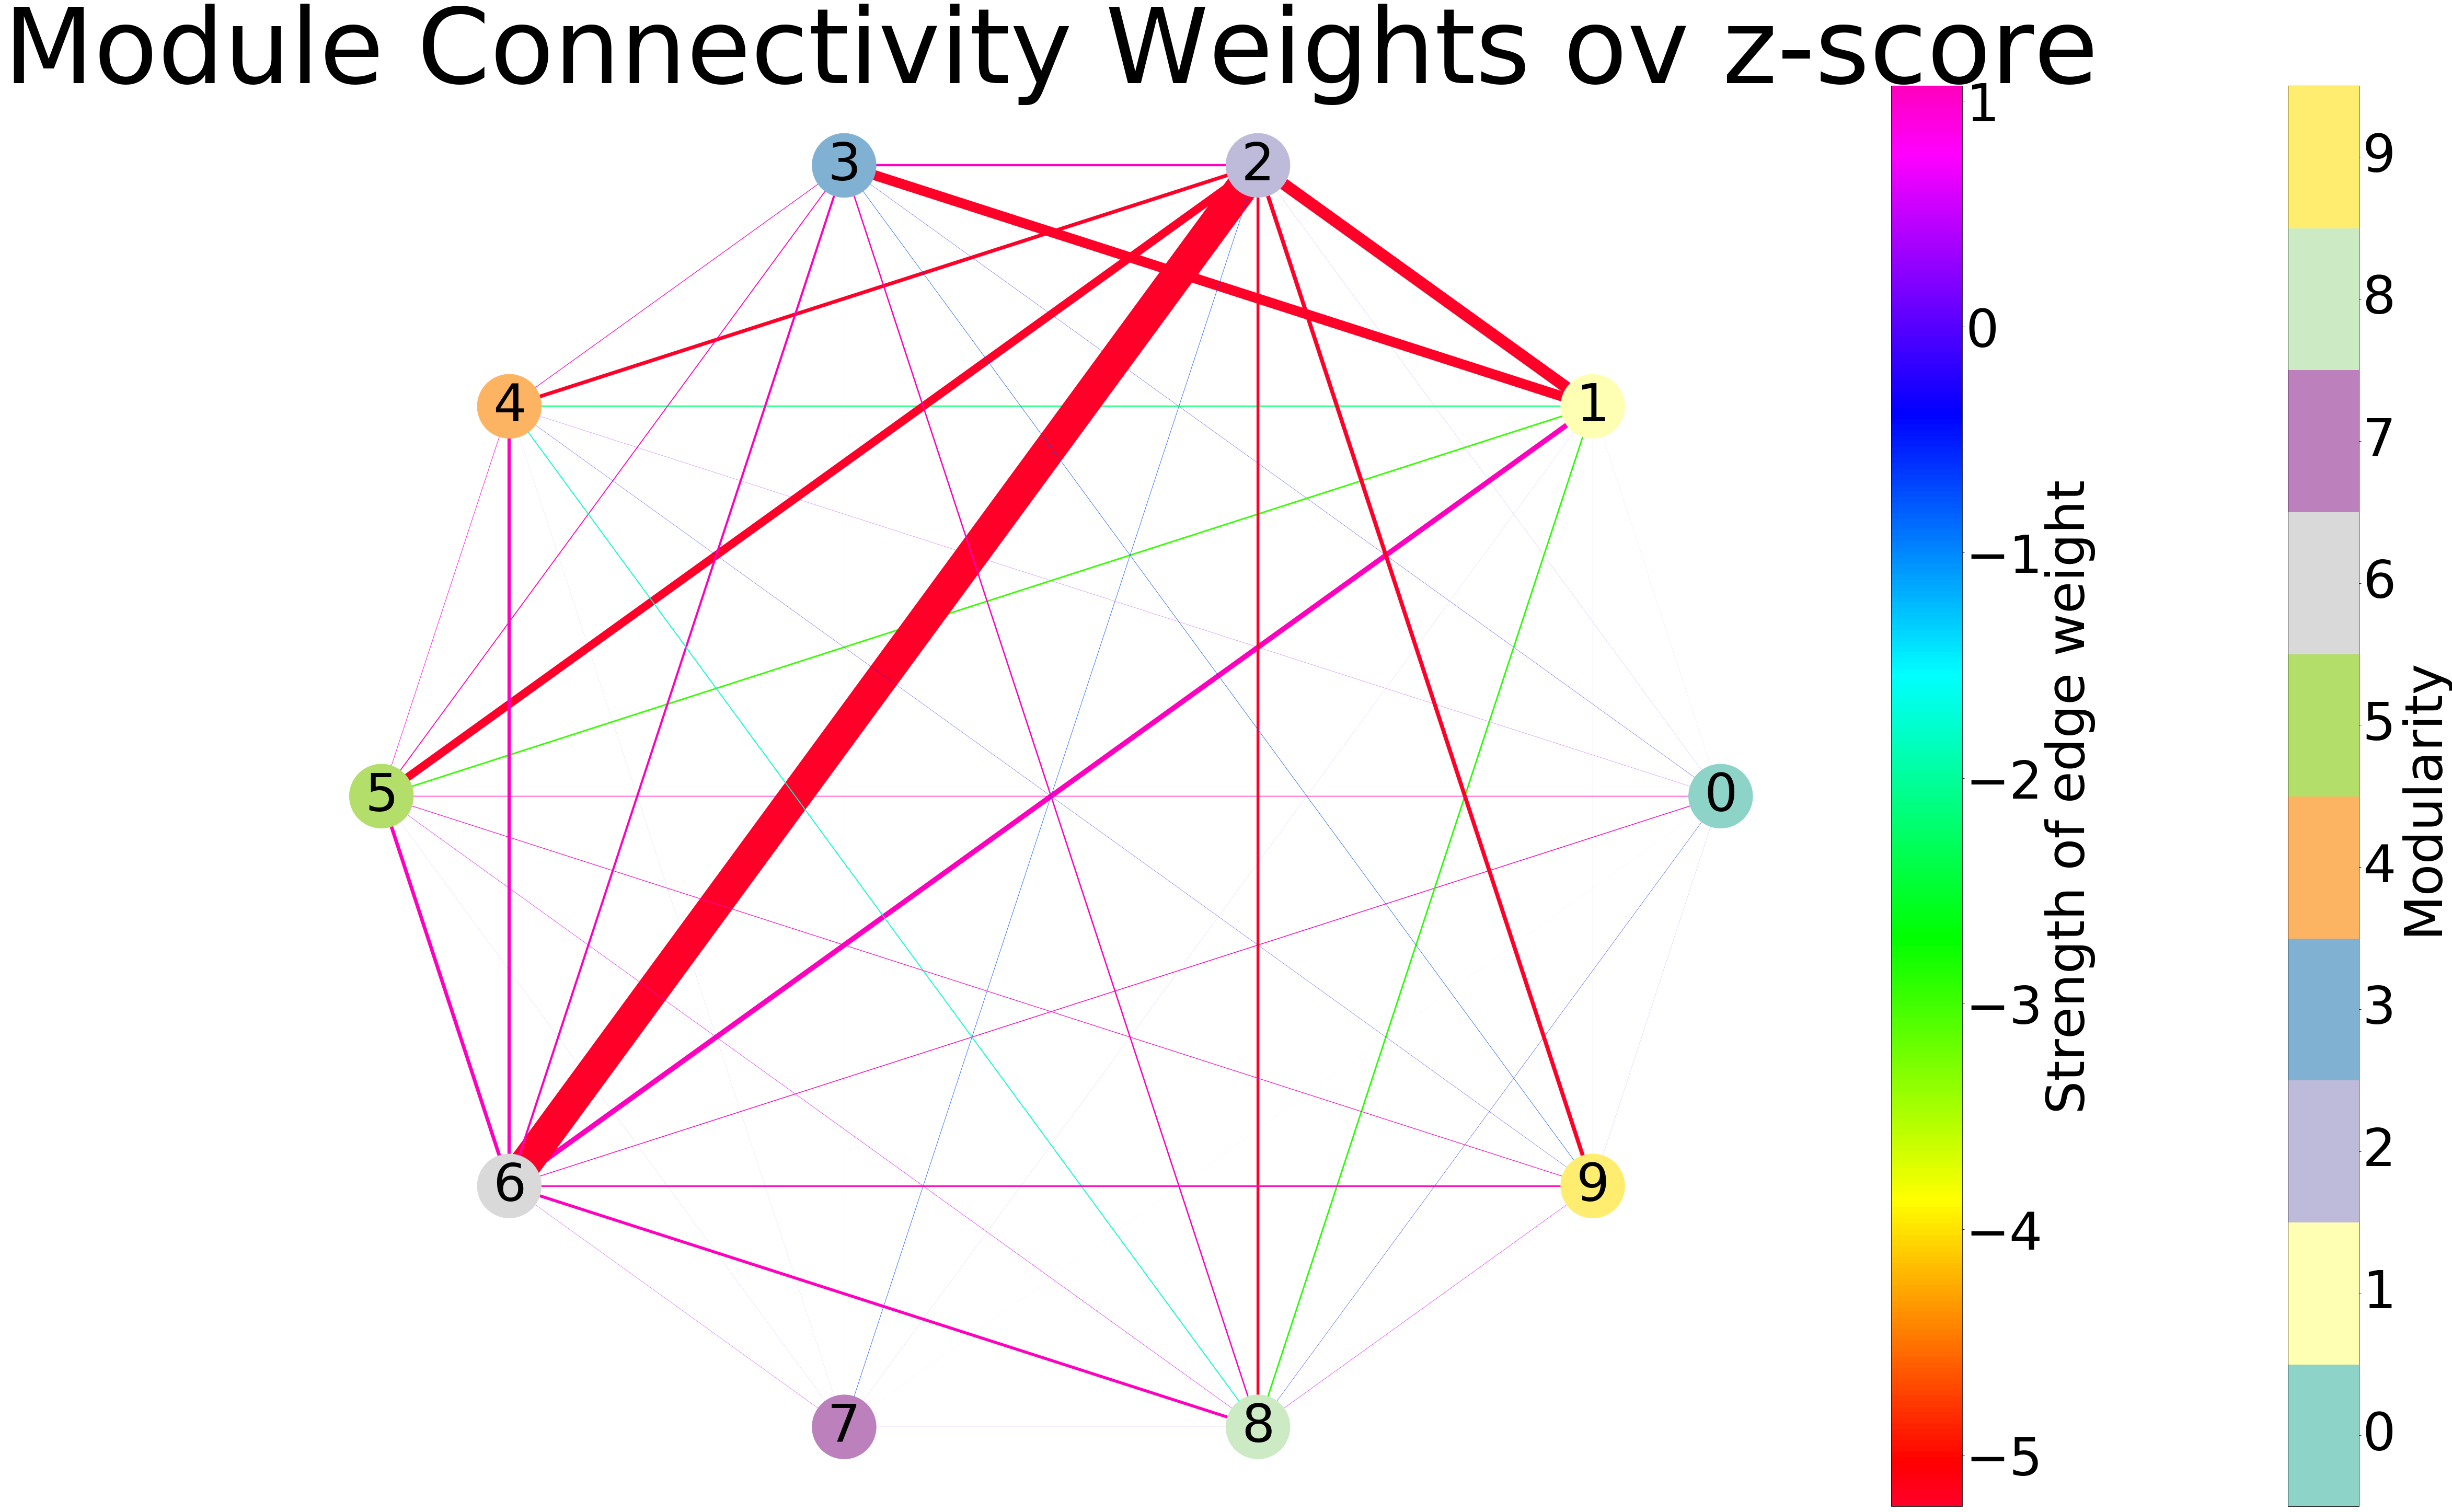

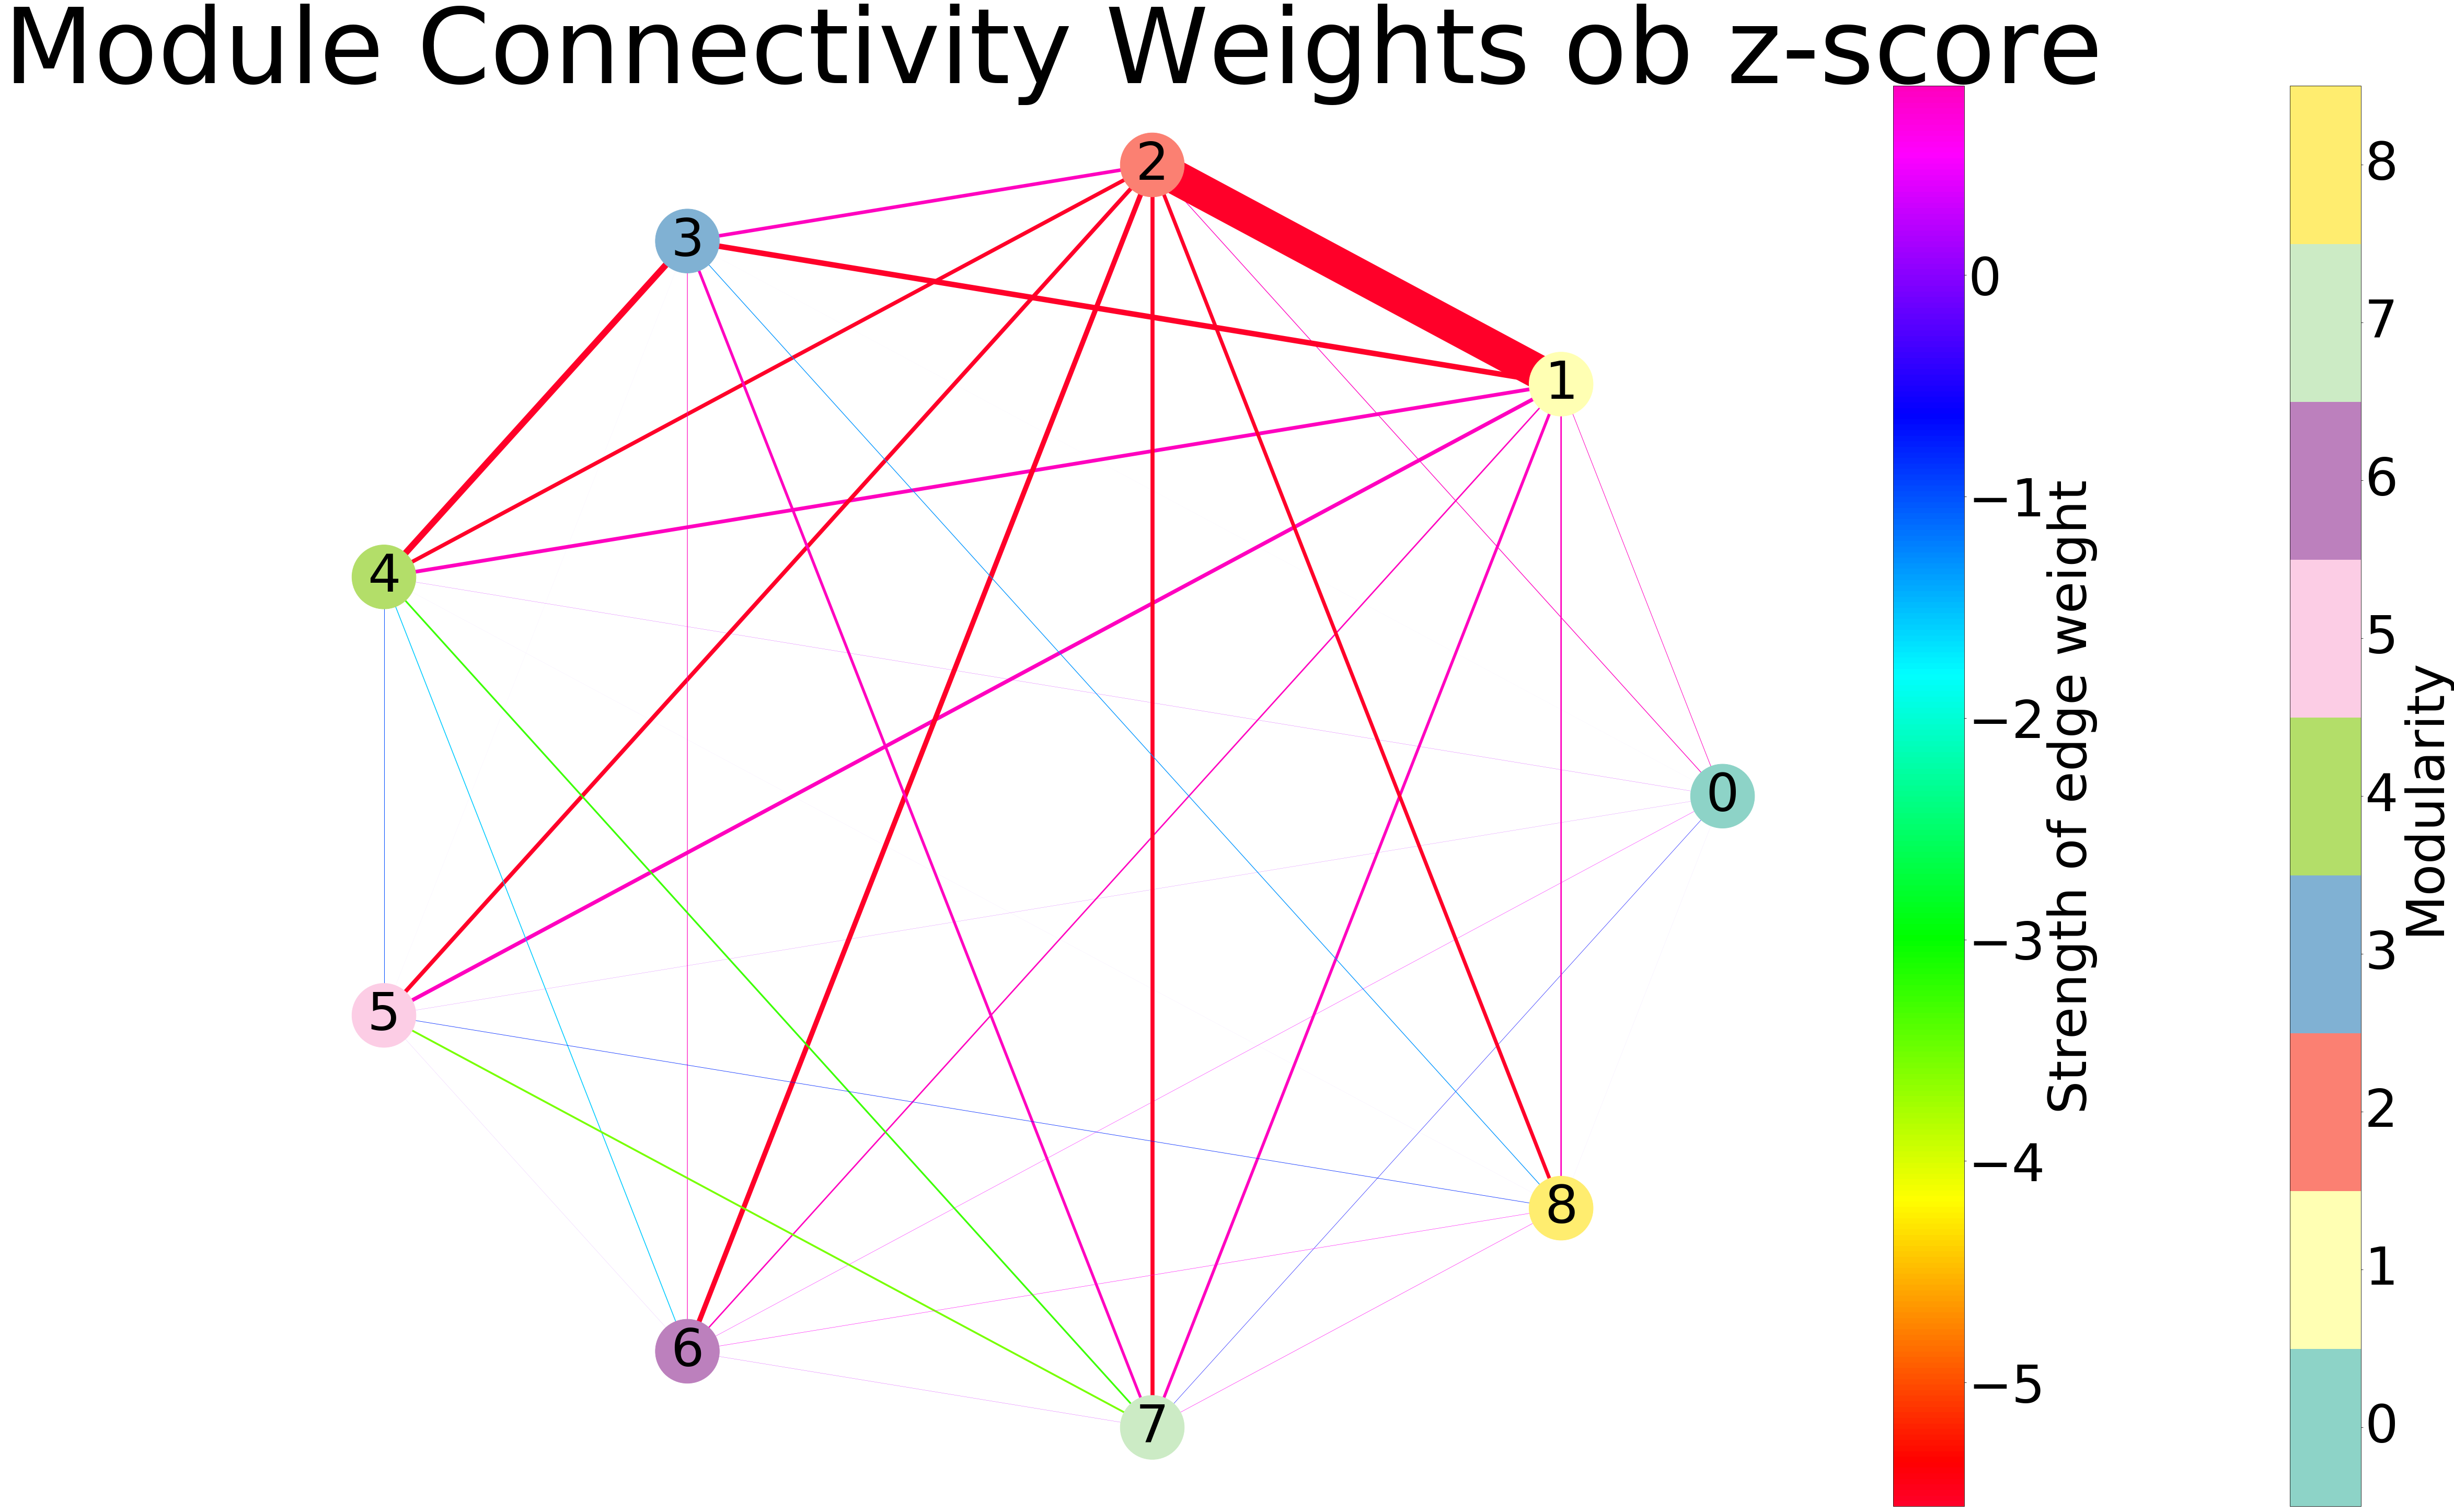

In [72]:
for key, graph in summary_dict['NR'].items():
    print(key)
    G=graph['comm_graph']
    aes=aes_dict[key]
    an.module_fig(G,'%s z-score'%key, basepath, aes)

In [73]:
labels

Index          label    Unnamed: 2        area     IC
0      73   R_Cerebellum  R_Cerebellum  Cerebellum  IC_73
1      59     R_Amygdala    R_Amygdala    Amygdala  IC_59
2      44  R_Auditory_18      R_A4_ROI    Auditory  IC_44
3      70      BrainStem     BrainStem   BrainStem  IC_70
4      79      BrainStem     BrainStem   BrainStem  IC_79
..    ...            ...           ...         ...    ...
95     29    R_Visual_29     R_MST_ROI      Visual  IC_29
96     31    R_Visual_28      R_V3_ROI      Visual  IC_31
97     38    R_Visual_37      R_V2_ROI      Visual  IC_38
98     53            NaN           NaN         NaN  IC_53
99     60            NaN           NaN         NaN  IC_60

[100 rows x 5 columns]

In [74]:
labels.set_index('Index', inplace=True)

In [75]:
lab_dict=labels.to_dict('index')

In [76]:
for group, mods in subgraph_dict.items():
    for mod, G in mods.items():
        nx.set_node_attributes(G,lab_dict, "labels")

In [77]:
g=subgraph_dict['no'][1]

In [78]:
g.nodes(data=True)

NodeDataView({1: {'centrality': 0.002973716896117888, 'clustering': 0.7468599033816425, 'PC': 0.5414961769047475, 'modules': 1, 'zDegree': -1.2465092548468877, 'sub_modules': 0, 'sub_zDegree': 0.17027051283966252, 'labels': {'label': 'R_Default_26', 'Unnamed: 2': 'R_PGi_RO', 'area': 'Default', 'IC': 'IC_1'}}, 6: {'centrality': 0.005565460193765314, 'clustering': 0.6334693877551021, 'PC': 0.5462153132710128, 'modules': 1, 'zDegree': -1.2465092548468877, 'sub_modules': 1, 'sub_zDegree': 0.38422114816229874, 'labels': {'label': 'R_FrontoParietal_10', 'Unnamed: 2': 'R_PFm_ROI', 'area': 'FrontoParietal', 'IC': 'IC_6'}}, 11: {'centrality': 0.003908304402685893, 'clustering': 0.6914893617021277, 'PC': 0.5759733195815202, 'modules': 1, 'zDegree': -1.2465092548468877, 'sub_modules': 0, 'sub_zDegree': 0.17027051283966252, 'labels': {'label': 'L_Default_20', 'Unnamed: 2': 'L_8Av_ROI ', 'area': 'Default', 'IC': 'IC_11'}}, 13: {'centrality': 0.005087939293813753, 'clustering': 0.5692307692307692, '

In [79]:
nodes, color = zip(*nx.get_node_attributes(g, 'labels').items())

In [80]:
nx.get_node_attributes(g, 'labels')[1]['area']
# nx.get_node_attributes(g, 'labels').values()


'Default'

In [81]:
new={}
for x,y in nx.get_node_attributes(g, 'labels').items():
#     print(x)
    new[x]=y['area']

In [82]:
for x in color:
    print(x['area'])

Default
FrontoParietal
Default
DorsalAttn
FrontoParietal
FrontoParietal
FrontoParietal
Cerebellum
FrontoParietal
Cerebellum
Cerebellum
Cerebellum
Cerebellum
nan
Cerebellum
Cerebellum
Cerebellum
Cerebellum
nan
Cerebellum
Cerebellum


In [83]:
groups = ['no','ov','ob']
mods = [2,4,0,5,2,6]
cc_=[11,16, 27, 35, 54, 58, 85]
for group in groups:
    for mod in mods:
        for x in cc_:
            if x in list(subgraph_dict[group][mod].nodes()):
                print('for %s in mod %i and node %i'%(group, mod, x))
                print(subgraph_dict[group][mod].nodes(data=True)[x])

for no in mod 2 and node 16
{'centrality': 0.0036364854098812865, 'clustering': 0.6576576576576577, 'PC': 0.14480628007000684, 'modules': 2, 'zDegree': -1.5683480251377848, 'sub_modules': 1, 'sub_zDegree': -1.4028850798949355, 'labels': {'label': 'L_Visual_7', 'Unnamed: 2': 'L_V6_ROI', 'area': 'Visual', 'IC': 'IC_16'}}
for no in mod 2 and node 27
{'centrality': 0.0015004524117019403, 'clustering': 0.7641129032258065, 'PC': 0.15644715805574017, 'modules': 2, 'zDegree': -1.5683480251377848, 'sub_modules': 1, 'sub_zDegree': -1.4028850798949355, 'labels': {'label': 'L_Visual_14', 'Unnamed: 2': 'L_V2_ROI', 'area': 'Visual', 'IC': 'IC_27'}}
for no in mod 2 and node 16
{'centrality': 0.0036364854098812865, 'clustering': 0.6576576576576577, 'PC': 0.14480628007000684, 'modules': 2, 'zDegree': -1.5683480251377848, 'sub_modules': 1, 'sub_zDegree': -1.4028850798949355, 'labels': {'label': 'L_Visual_7', 'Unnamed: 2': 'L_V6_ROI', 'area': 'Visual', 'IC': 'IC_16'}}
for no in mod 2 and node 27
{'centra

In [84]:
def aesthetics(graph, node_size, font_size, font_family, font_weight, edge_att, plot_size, mod):
    aes={'general':{},
         'nodes':{},
         'edges':{}}
    # nodes
    color = np.array(list(graph.nodes))
    color = np.array(color)
    n_color=len(list(set(color)))
    print(n_color)
    aes['nodes']['color'] = color
    aes['nodes']['colormap'] = ['Set3', n_color]
    aes['nodes']['n_color'] = n_color
    aes['nodes']['max'] = float(color.max())
    aes['nodes']['min'] = float(color.min())
    aes['nodes']['font_size'] = int(font_size)
    aes['nodes']['font_family'] = font_family
    aes['nodes']['font_weight'] = font_weight
    aes['nodes']['node_size'] = int(node_size)
    #edges
    aes['edges']['colormap'] = plt.cm.gist_rainbow
    edges,weights = zip(*nx.get_edge_attributes(graph,edge_att).items())
    weights=np.array(weights)
    aes['edges']['width mod'] = mod
    aes['edges']['min'] = weights.min()
    aes['edges']['max'] = weights.max()
    # General
    aes['general']['plot_size']=plot_size #tuple 80,50
    return(aes)

In [85]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def basic_graph(graph, scl, FONT, metric, size, tile, basepath, bmi, mod):
    #threshold
    e,w = zip(*nx.get_edge_attributes(graph, 'weight').items())
    purr=np.percentile(w, tile)
    g=an.threshold2(graph,purr)
    # style
    fig = plt.figure(figsize = size)
    ax1 = plt.subplot(111, aspect = 'equal')
    plt.subplots_adjust(left=0.25, bottom=0, right=0.75, top=1, wspace=0.2, hspace=0)

    positions=nx.circular_layout(g)
    
    # NODES
    nodes, color = zip(*nx.get_node_attributes(g, metric).items())
    nodes, label = zip(*nx.get_node_attributes(g, 'labels').items())
    nodes, size = zip(*nx.get_node_attributes(g, metric).items())
    new={}
    for x,y in nx.get_node_attributes(g, 'labels').items():
        new[x]=y['area']
    
    #draws nodes
    color = np.array(color)
    colz=stats.zscore(color)
    nColormap=plt.cm.cool 
    cM=colz.max()
    cm=colz.min()

    scale=scl/colz.max()
    nx.draw_networkx_nodes(g,
                             positions,
                             node_color=colz,
                             node_size=np.square(colz)*scale,
                             alpha=0.8,
                             cmap= nColormap,
                             vmin=cm ,vmax=cM)

    #Styling for labels
    nx.draw_networkx_labels(g, 
                            positions,
                            new,
                            font_size=FONT,
                            font_family='sans-serif',
                            fontweight = 'bold',
                            horizontalalignment = 'center',
                            verticalalignment = 'top')


    # EDGES 
    edges,weights = zip(*nx.get_edge_attributes(g, 'weight').items())
    #draw edges
    weights=np.array(weights)
    eColormap=plt.cm.gist_rainbow #check here if you want different colors https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

    nx.draw_networkx_edges(g, 
                             positions,
                             edge_list=edges,
                             style='solid',
                             width = np.square(weights)*200,
                             edge_color = weights,
                             edge_cmap=eColormap,
                             edge_vmin=weights.min(),
                             edge_vmax=weights.max())
    
    #FInishing touches


    plt.axis('off')
    if bmi == 'no':
        plt.title("%s and edge weights of \n %s graph"%(metric, 'Average BMI'), fontsize = FONT)
    if bmi == 'ov':
        plt.title("%s and edge weights of \n %s graph"%(metric, 'High BMI'), fontsize = FONT)
    if bmi == 'ob':
        plt.title("%s and edge weights of \n %s graph"%(metric, 'Very high BMI'), fontsize = FONT)
    

    axins1 = inset_axes(ax1,
                    width="2.5%",  # width = 50% of parent_bbox width
                    height="100%",  # height : 5%
                    loc='right',
                    bbox_to_anchor=(0.15, 0., 1, 1), #(x0, y0, width, height)
                    bbox_transform=ax1.transAxes,
                    borderpad=1)
    
    axins2 = inset_axes(ax1,
                    width="2.5%",  # width = 50% of parent_bbox width
                    height="100%",  # height : 5%
                    loc='right',
                    bbox_to_anchor=(.25, 0, 1, 1),
                    bbox_transform=ax1.transAxes,
                    borderpad=1)

    sm = plt.cm.ScalarMappable(cmap=eColormap, norm=plt.Normalize(vmin = weights.min(), vmax=weights.max()))
    sm._A = []

    edge_bar=fig.colorbar(sm, cax=axins1, orientation="vertical")
    for l in edge_bar.ax.yaxis.get_ticklabels():
        l.set_size(FONT)
    edge_bar.set_label('Strength of edge weight', fontsize = FONT)
    
    sn = plt.cm.ScalarMappable(cmap=nColormap, norm=plt.Normalize(vmin = cm, vmax=cM))
    sn._A = []
    
    rgb = sn.to_rgba(x=colz)
    save={}
    i = 0
    for x,y in nx.get_node_attributes(g, 'labels').items():
        save[x]=[y['IC'], y['area'], np.round(rgb[i]*255)]
        i=i+1
    
    node_bar=fig.colorbar(sn, cax=axins2, label='Module value')
    for l in node_bar.ax.yaxis.get_ticklabels():
        l.set_size(FONT)
    node_bar.set_label('%s'%metric,fontsize = FONT)
    
    
    basepath='/Users/gracer/Google Drive/HCP/HCP_graph/1200/images'
    if bmi == 'no':
        plt.savefig(os.path.join(basepath,"%s_%s_%s.png"%(metric, 'Average BMI', mod)), format="PNG")
    if bmi == 'ov':
        plt.savefig(os.path.join(basepath,"%s_%s_%s.png"%(metric, 'High BMI', mod)), format="PNG")
    if bmi == 'ob':
        plt.savefig(os.path.join(basepath,"%s_%s_%s.png"%(metric, 'Very high BMI', mod)), format="PNG")
    plt.show()
    return(save)


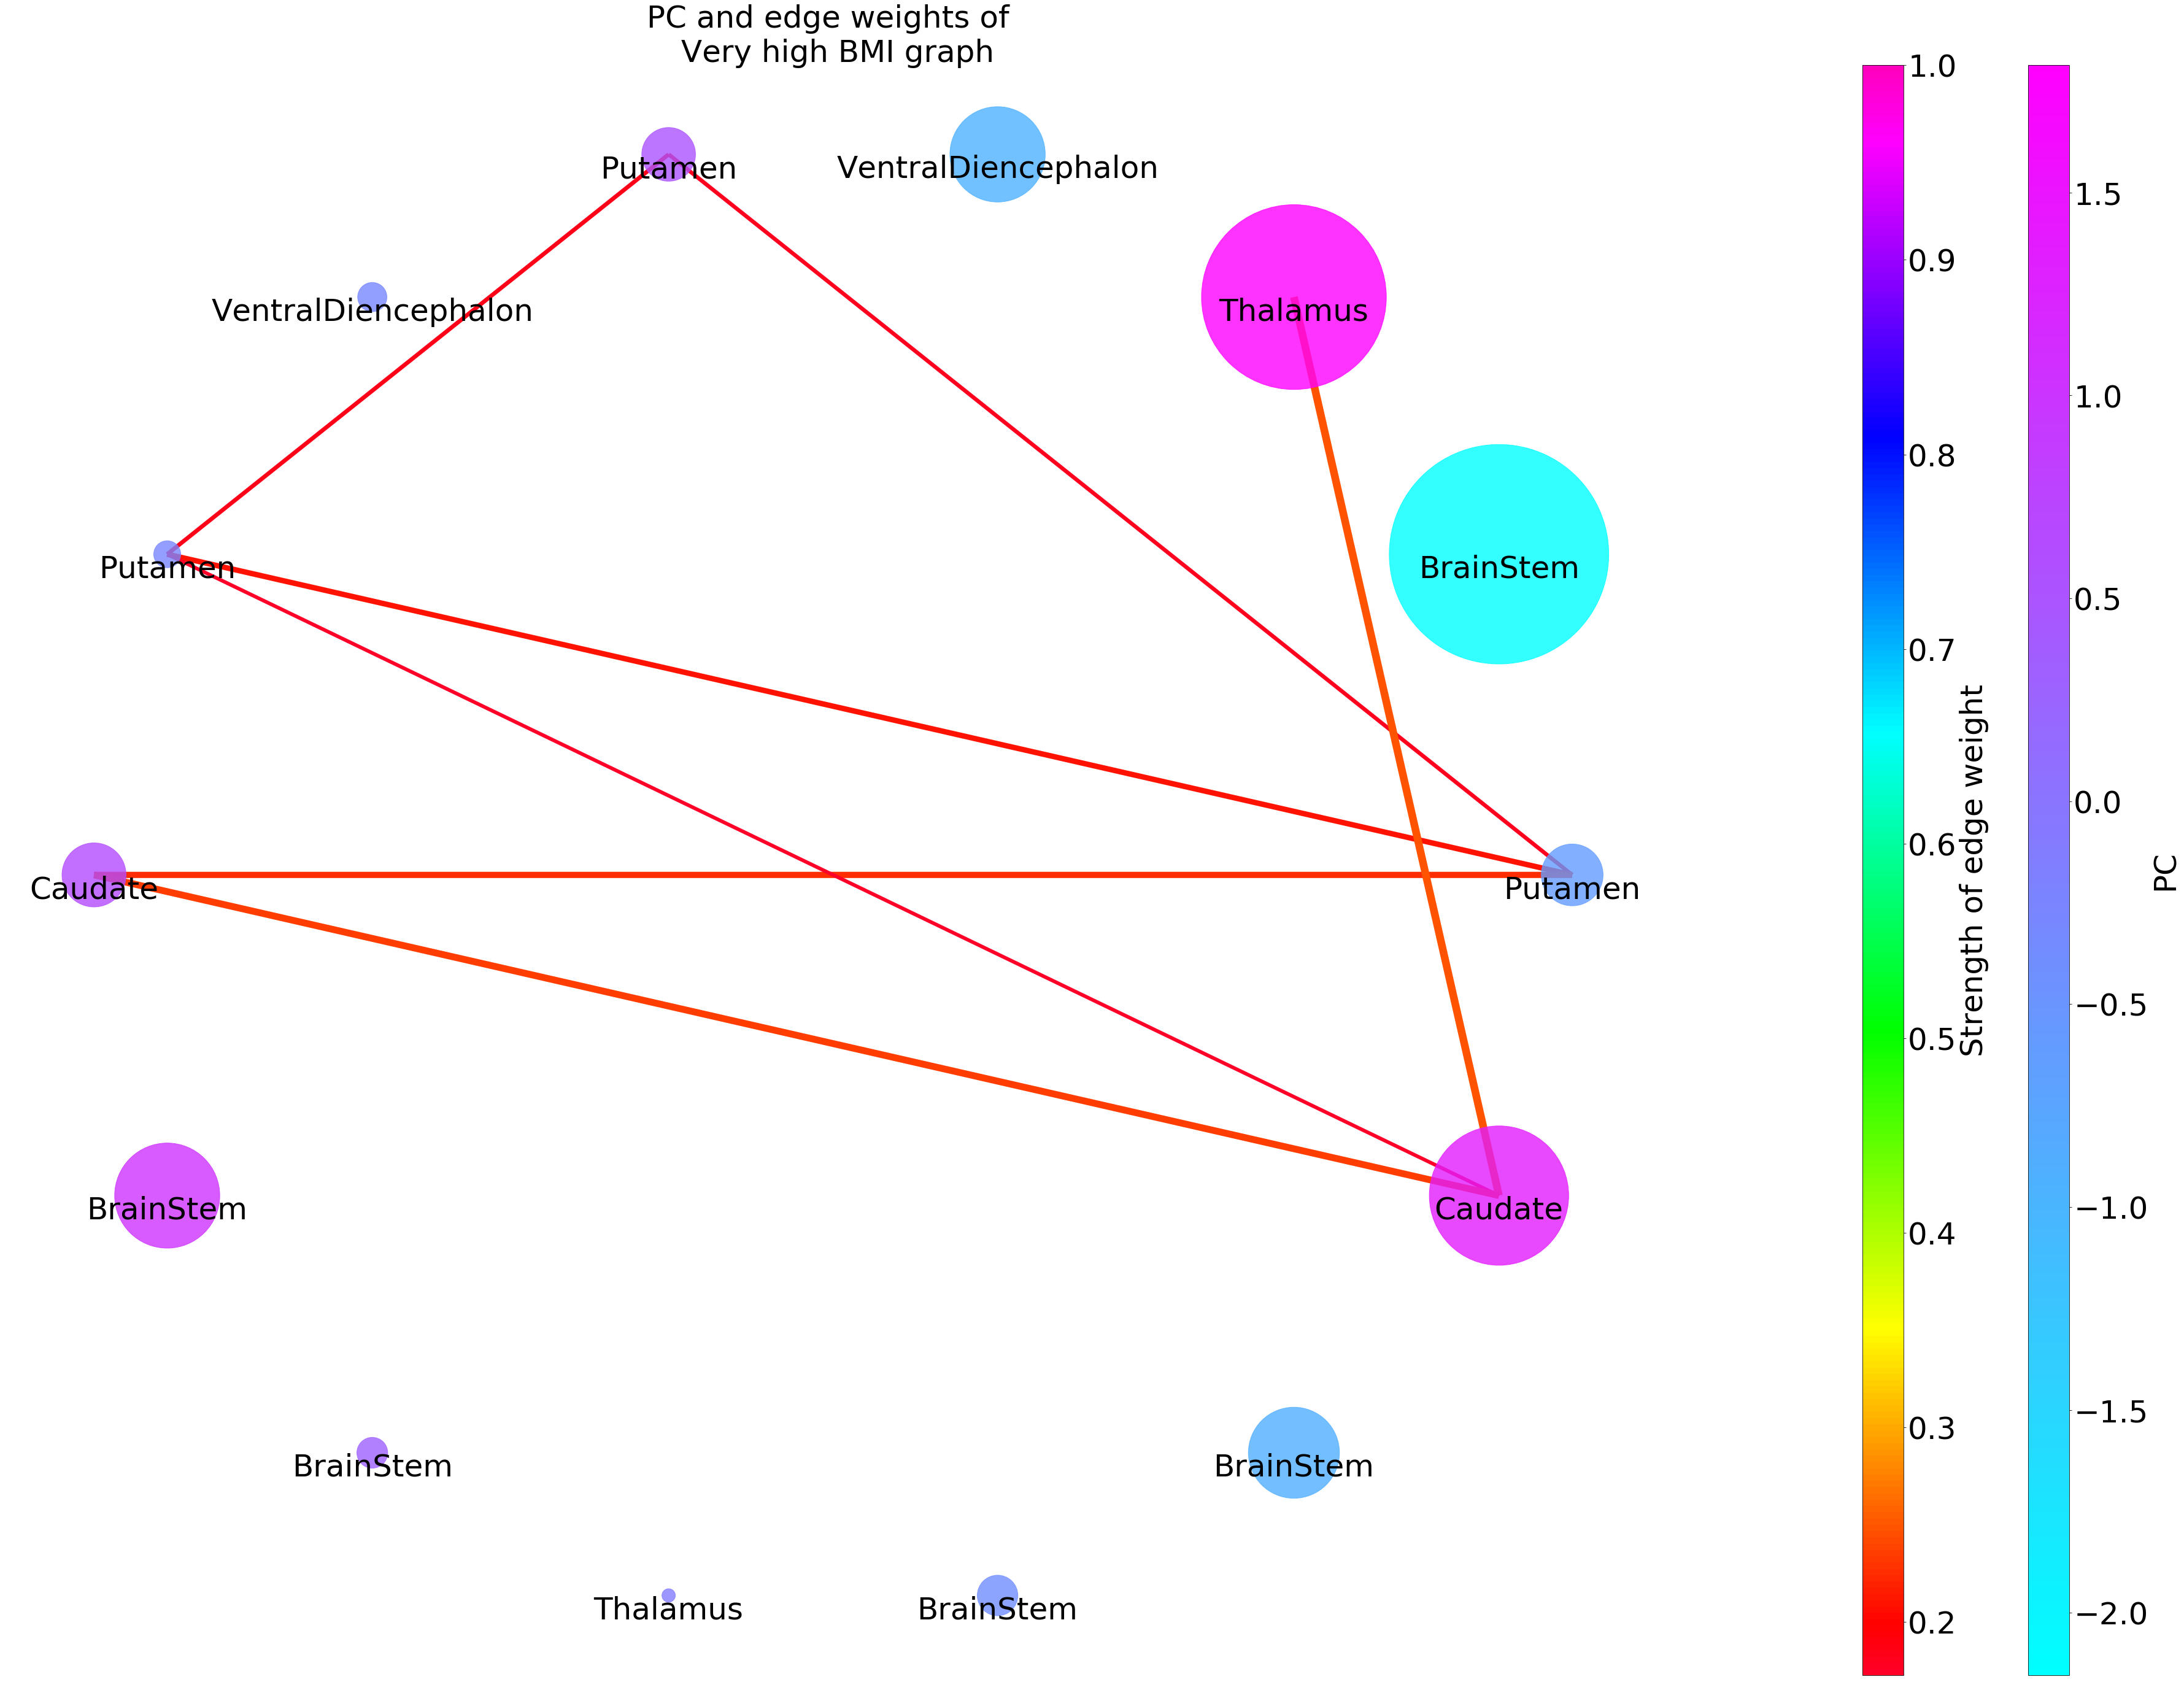

{64: ['IC_64', 'Putamen', array([ 99., 156., 255., 255.])],
 97: ['IC_97', 'BrainStem', array([  0., 255., 255., 255.])],
 66: ['IC_66', 'Thalamus', array([255.,   0., 255., 255.])],
 98: ['IC_98', 'VentralDiencephalon', array([ 78., 177., 255., 255.])],
 68: ['IC_68', 'Putamen', array([172.,  83., 255., 255.])],
 99: ['IC_99', 'VentralDiencephalon', array([120., 135., 255., 255.])],
 75: ['IC_75', 'Putamen', array([121., 134., 255., 255.])],
 78: ['IC_78', 'Caudate', array([179.,  76., 255., 255.])],
 79: ['IC_79', 'BrainStem', array([205.,  50., 255., 255.])],
 85: ['IC_85', 'BrainStem', array([158.,  97., 255., 255.])],
 86: ['IC_86', 'Thalamus', array([130., 125., 255., 255.])],
 94: ['IC_94', 'BrainStem', array([113., 142., 255., 255.])],
 90: ['IC_90', 'BrainStem', array([ 81., 174., 255., 255.])],
 62: ['IC_62', 'Caudate', array([227.,  28., 255., 255.])]}

In [86]:
basic_graph(subgraph_dict[group][mod], 50000, 50, 'PC', (75,50), 80, basepath, '%s'%group, '%i'%mod)

no
2


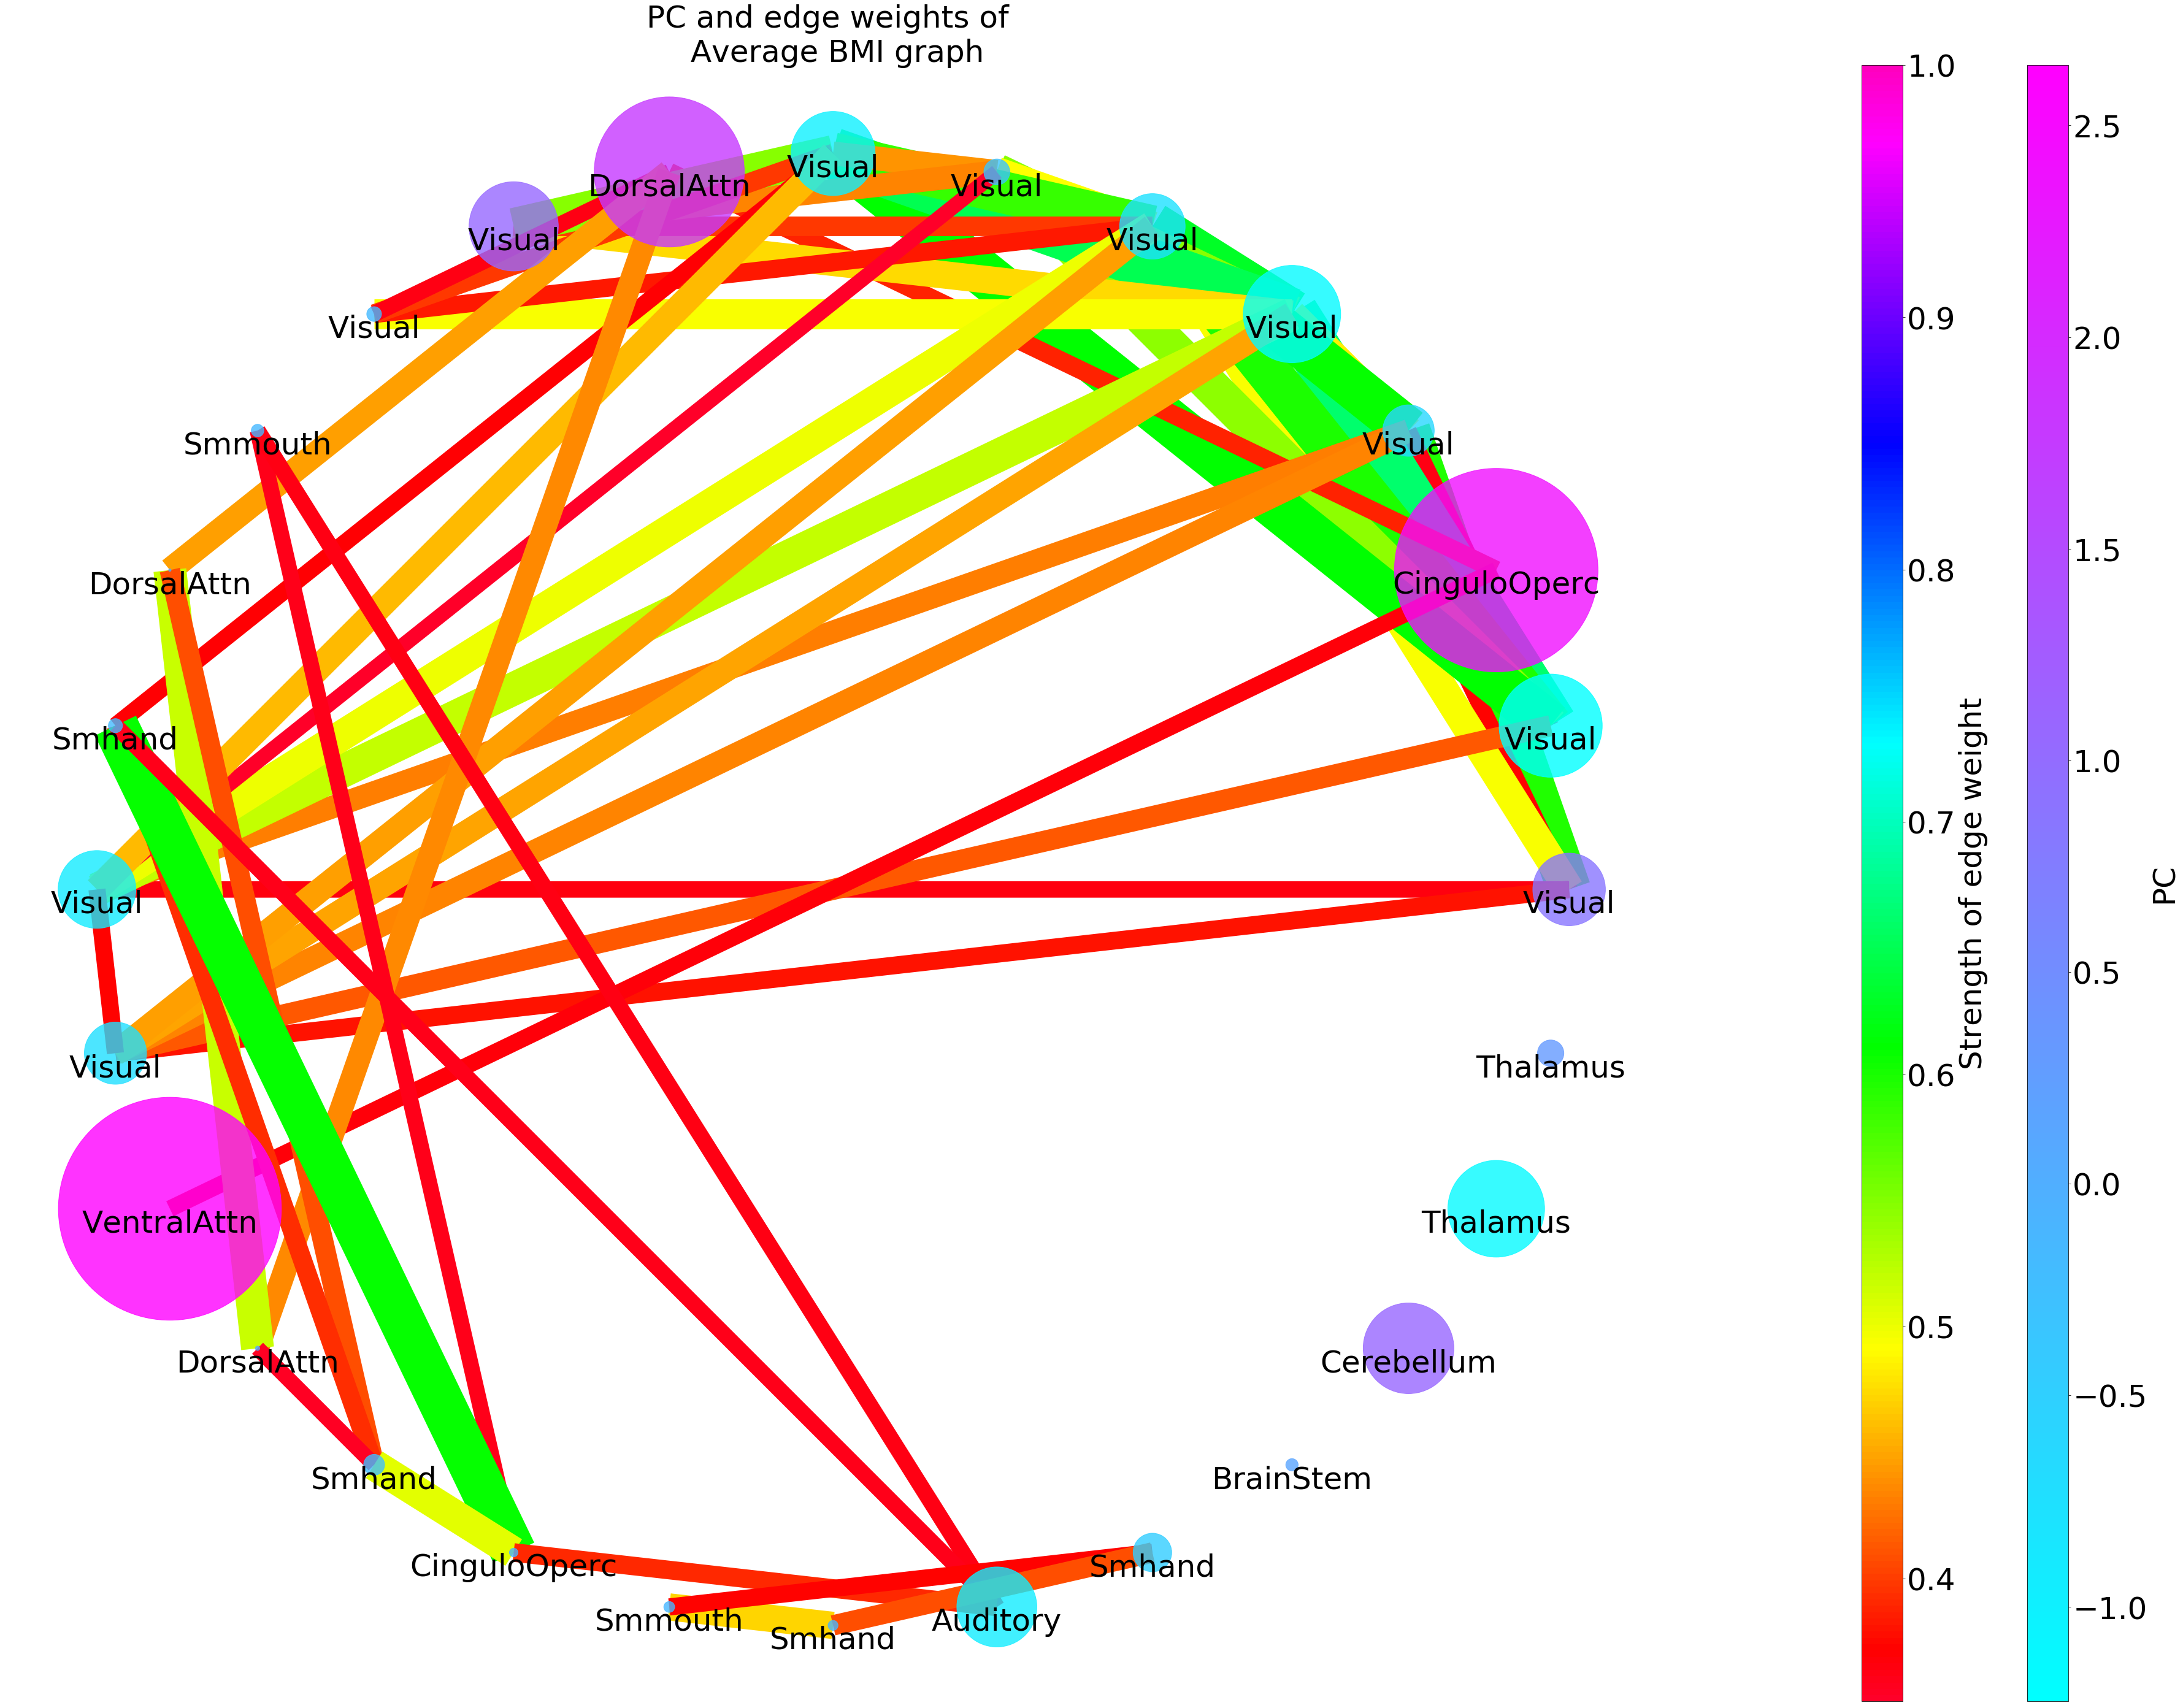

4


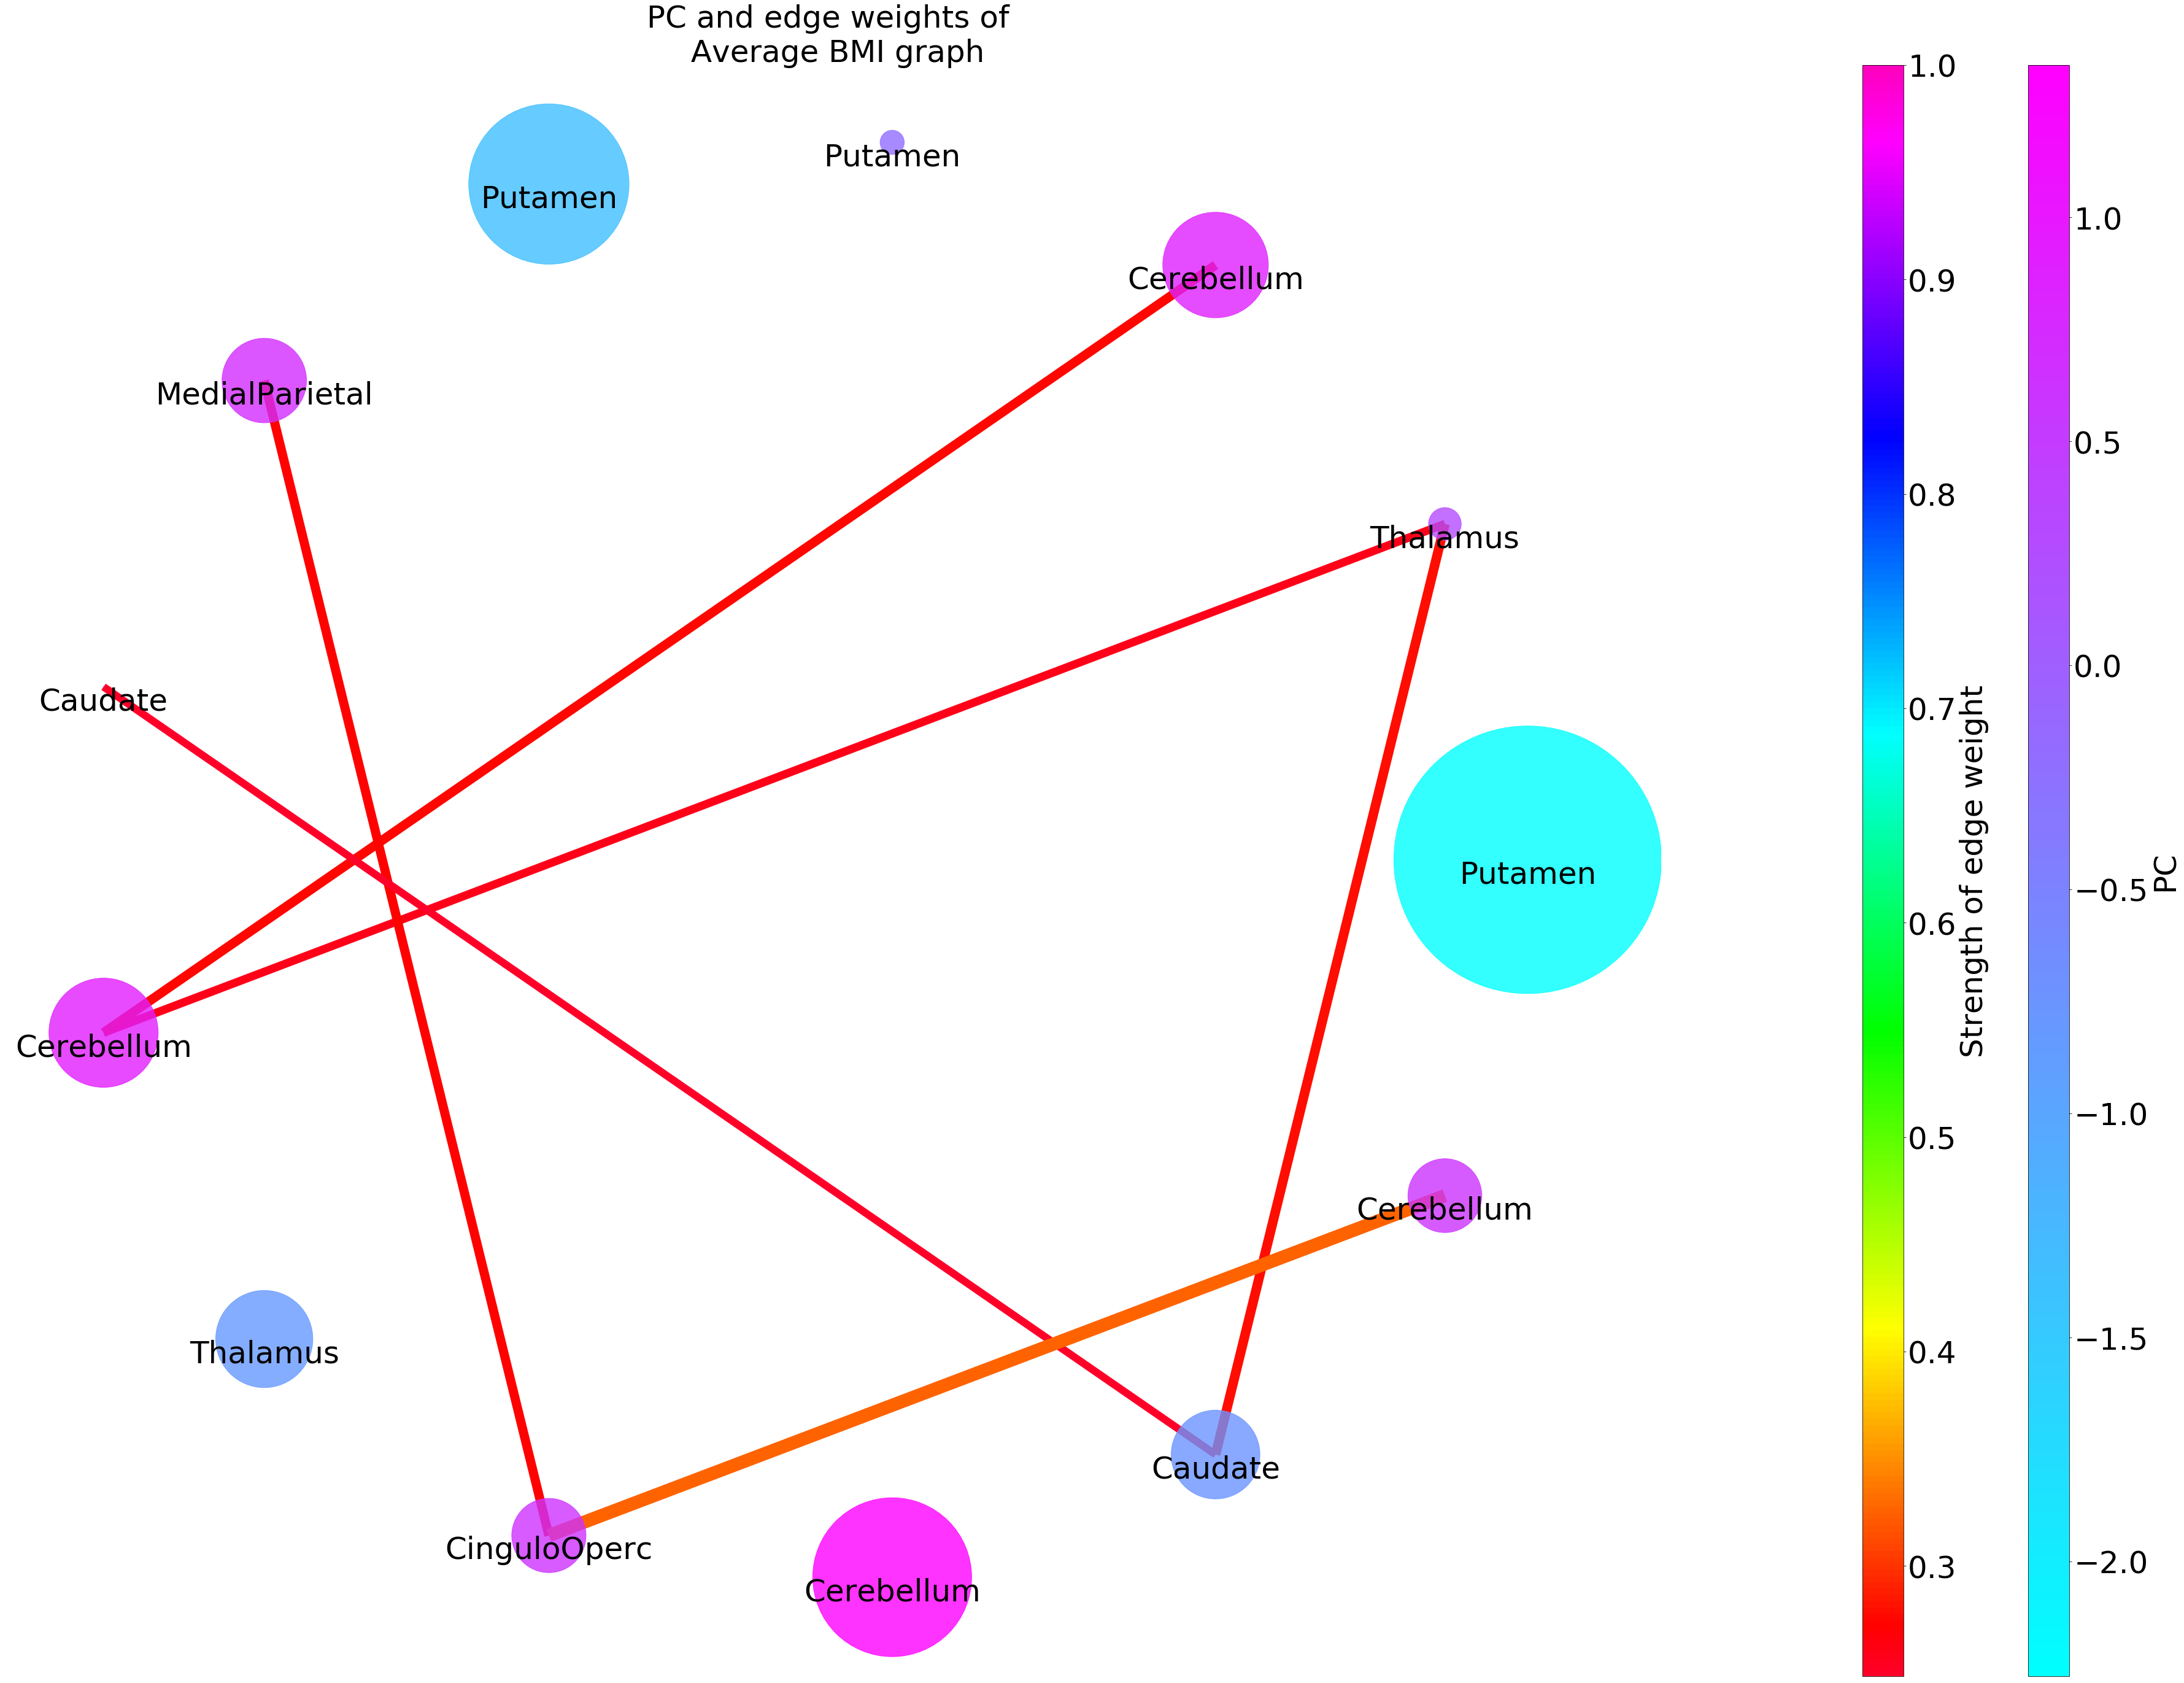

ov
0


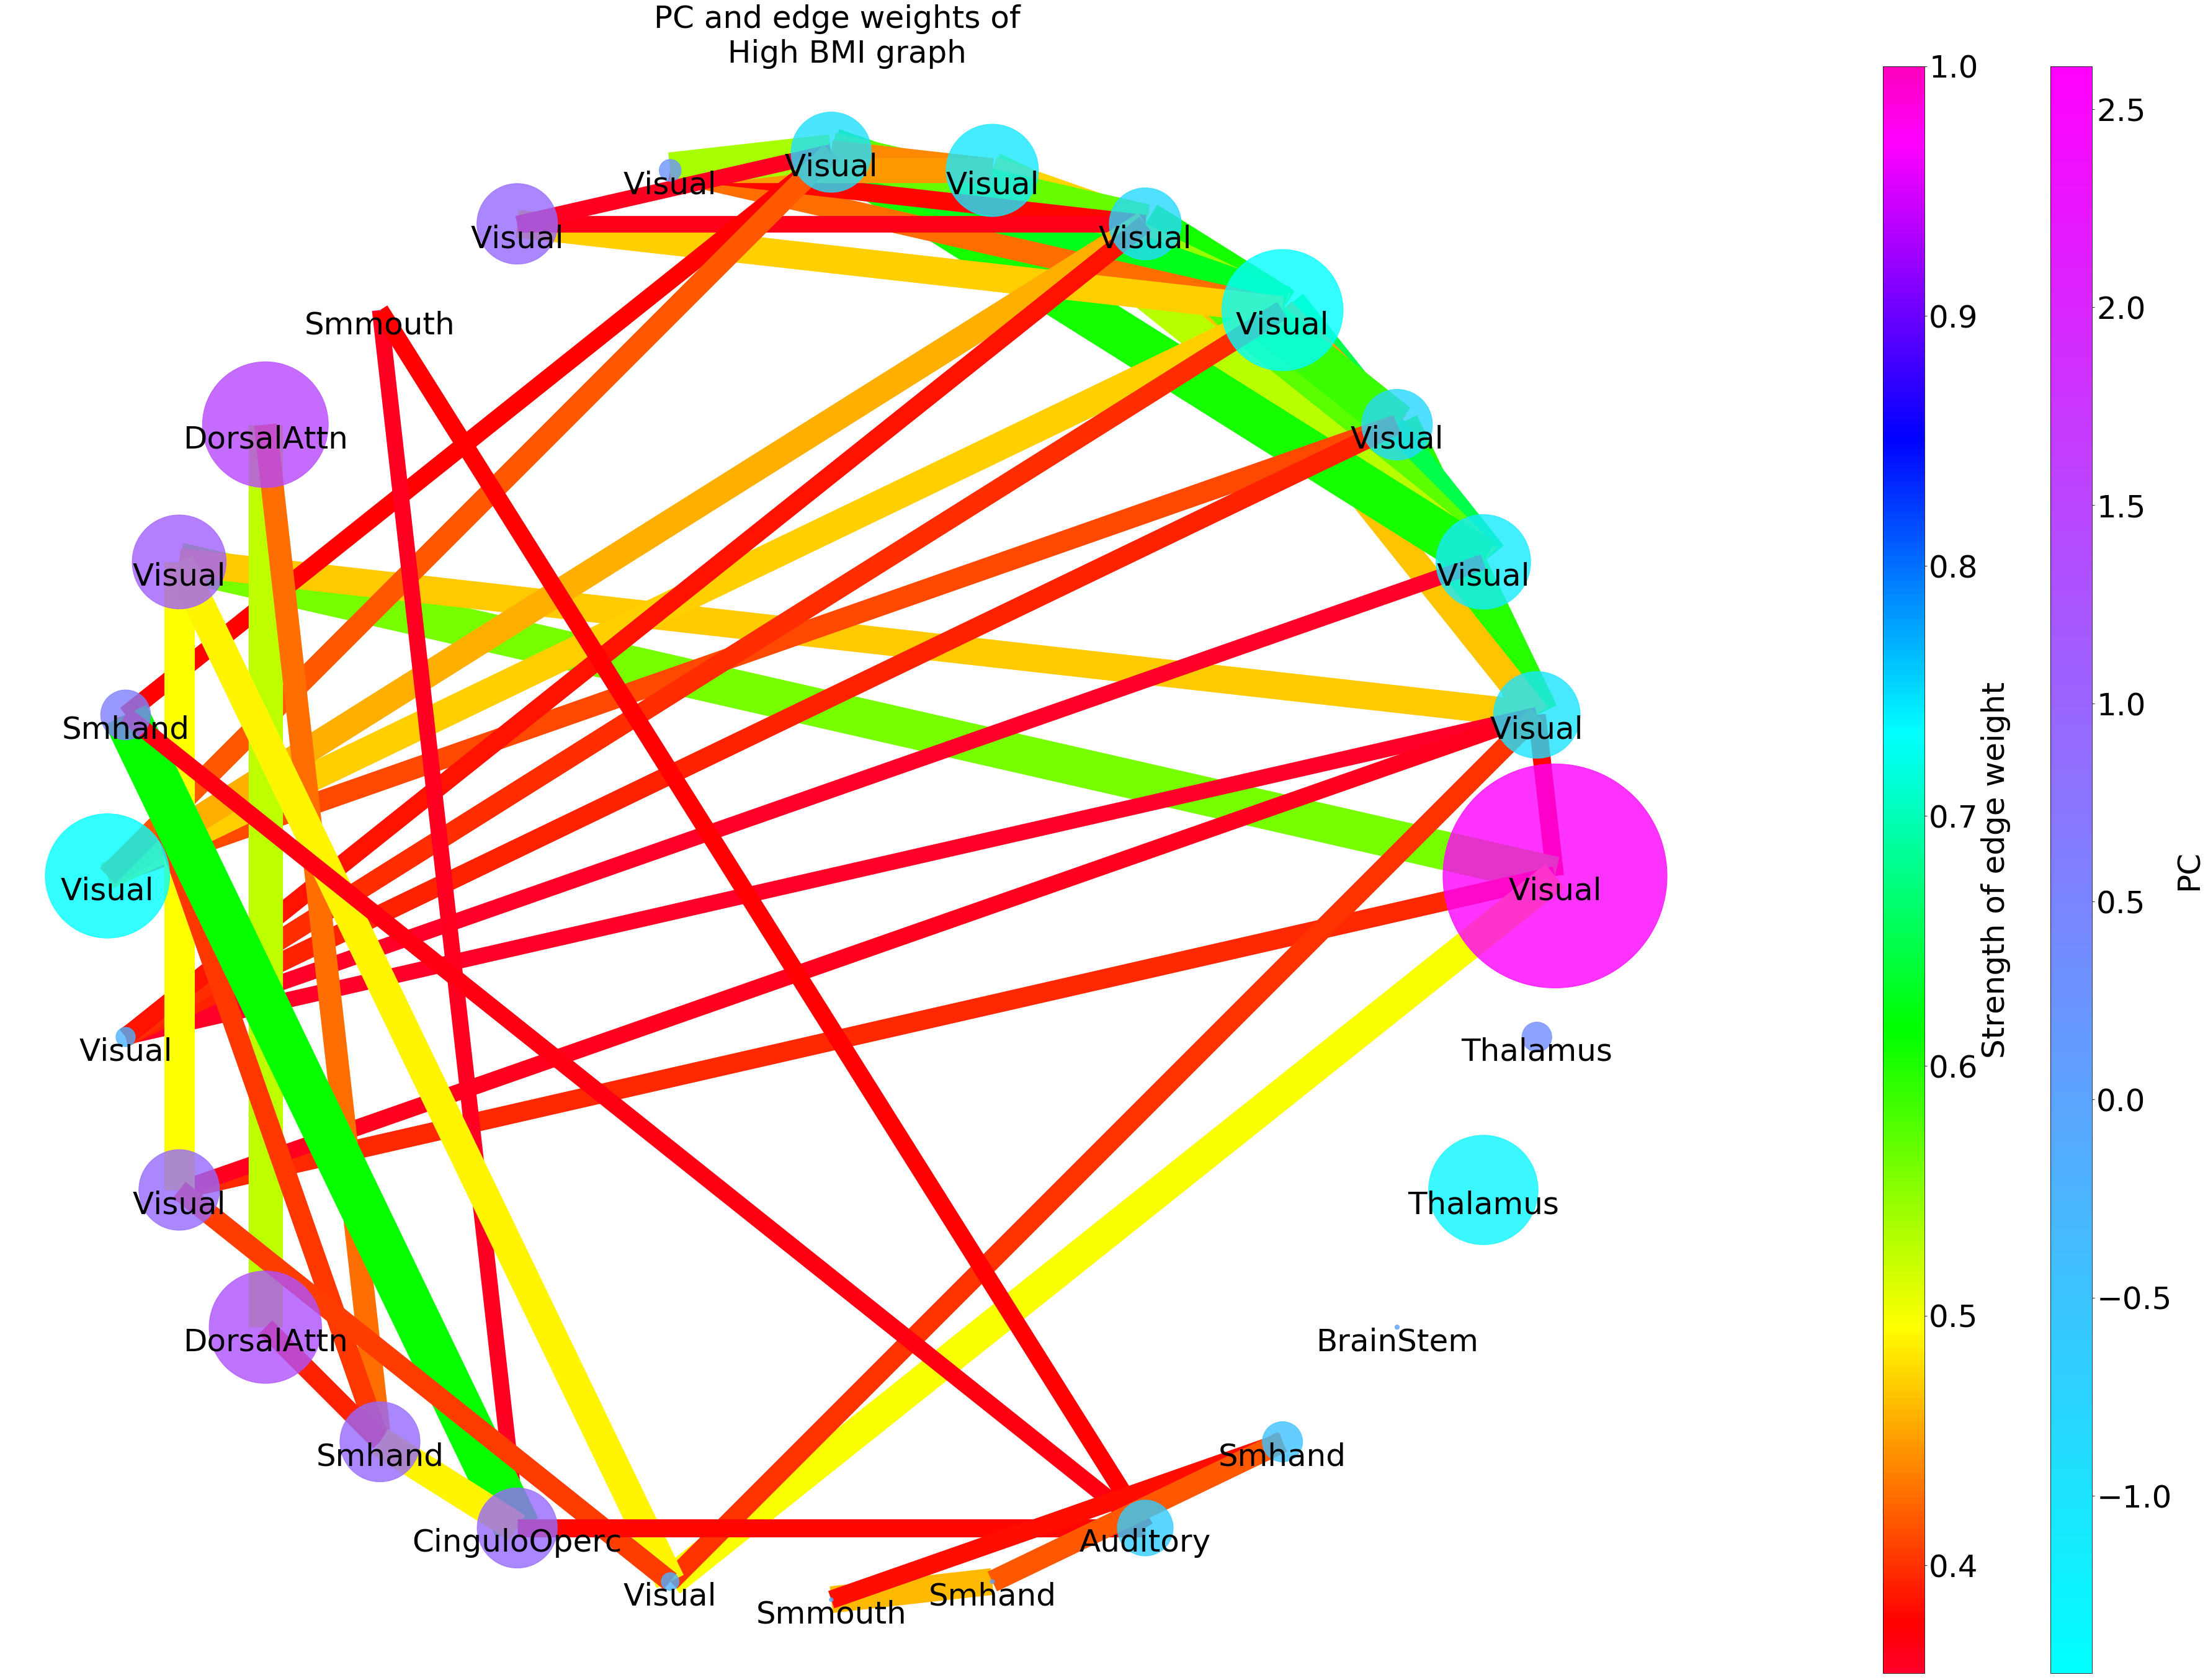

5


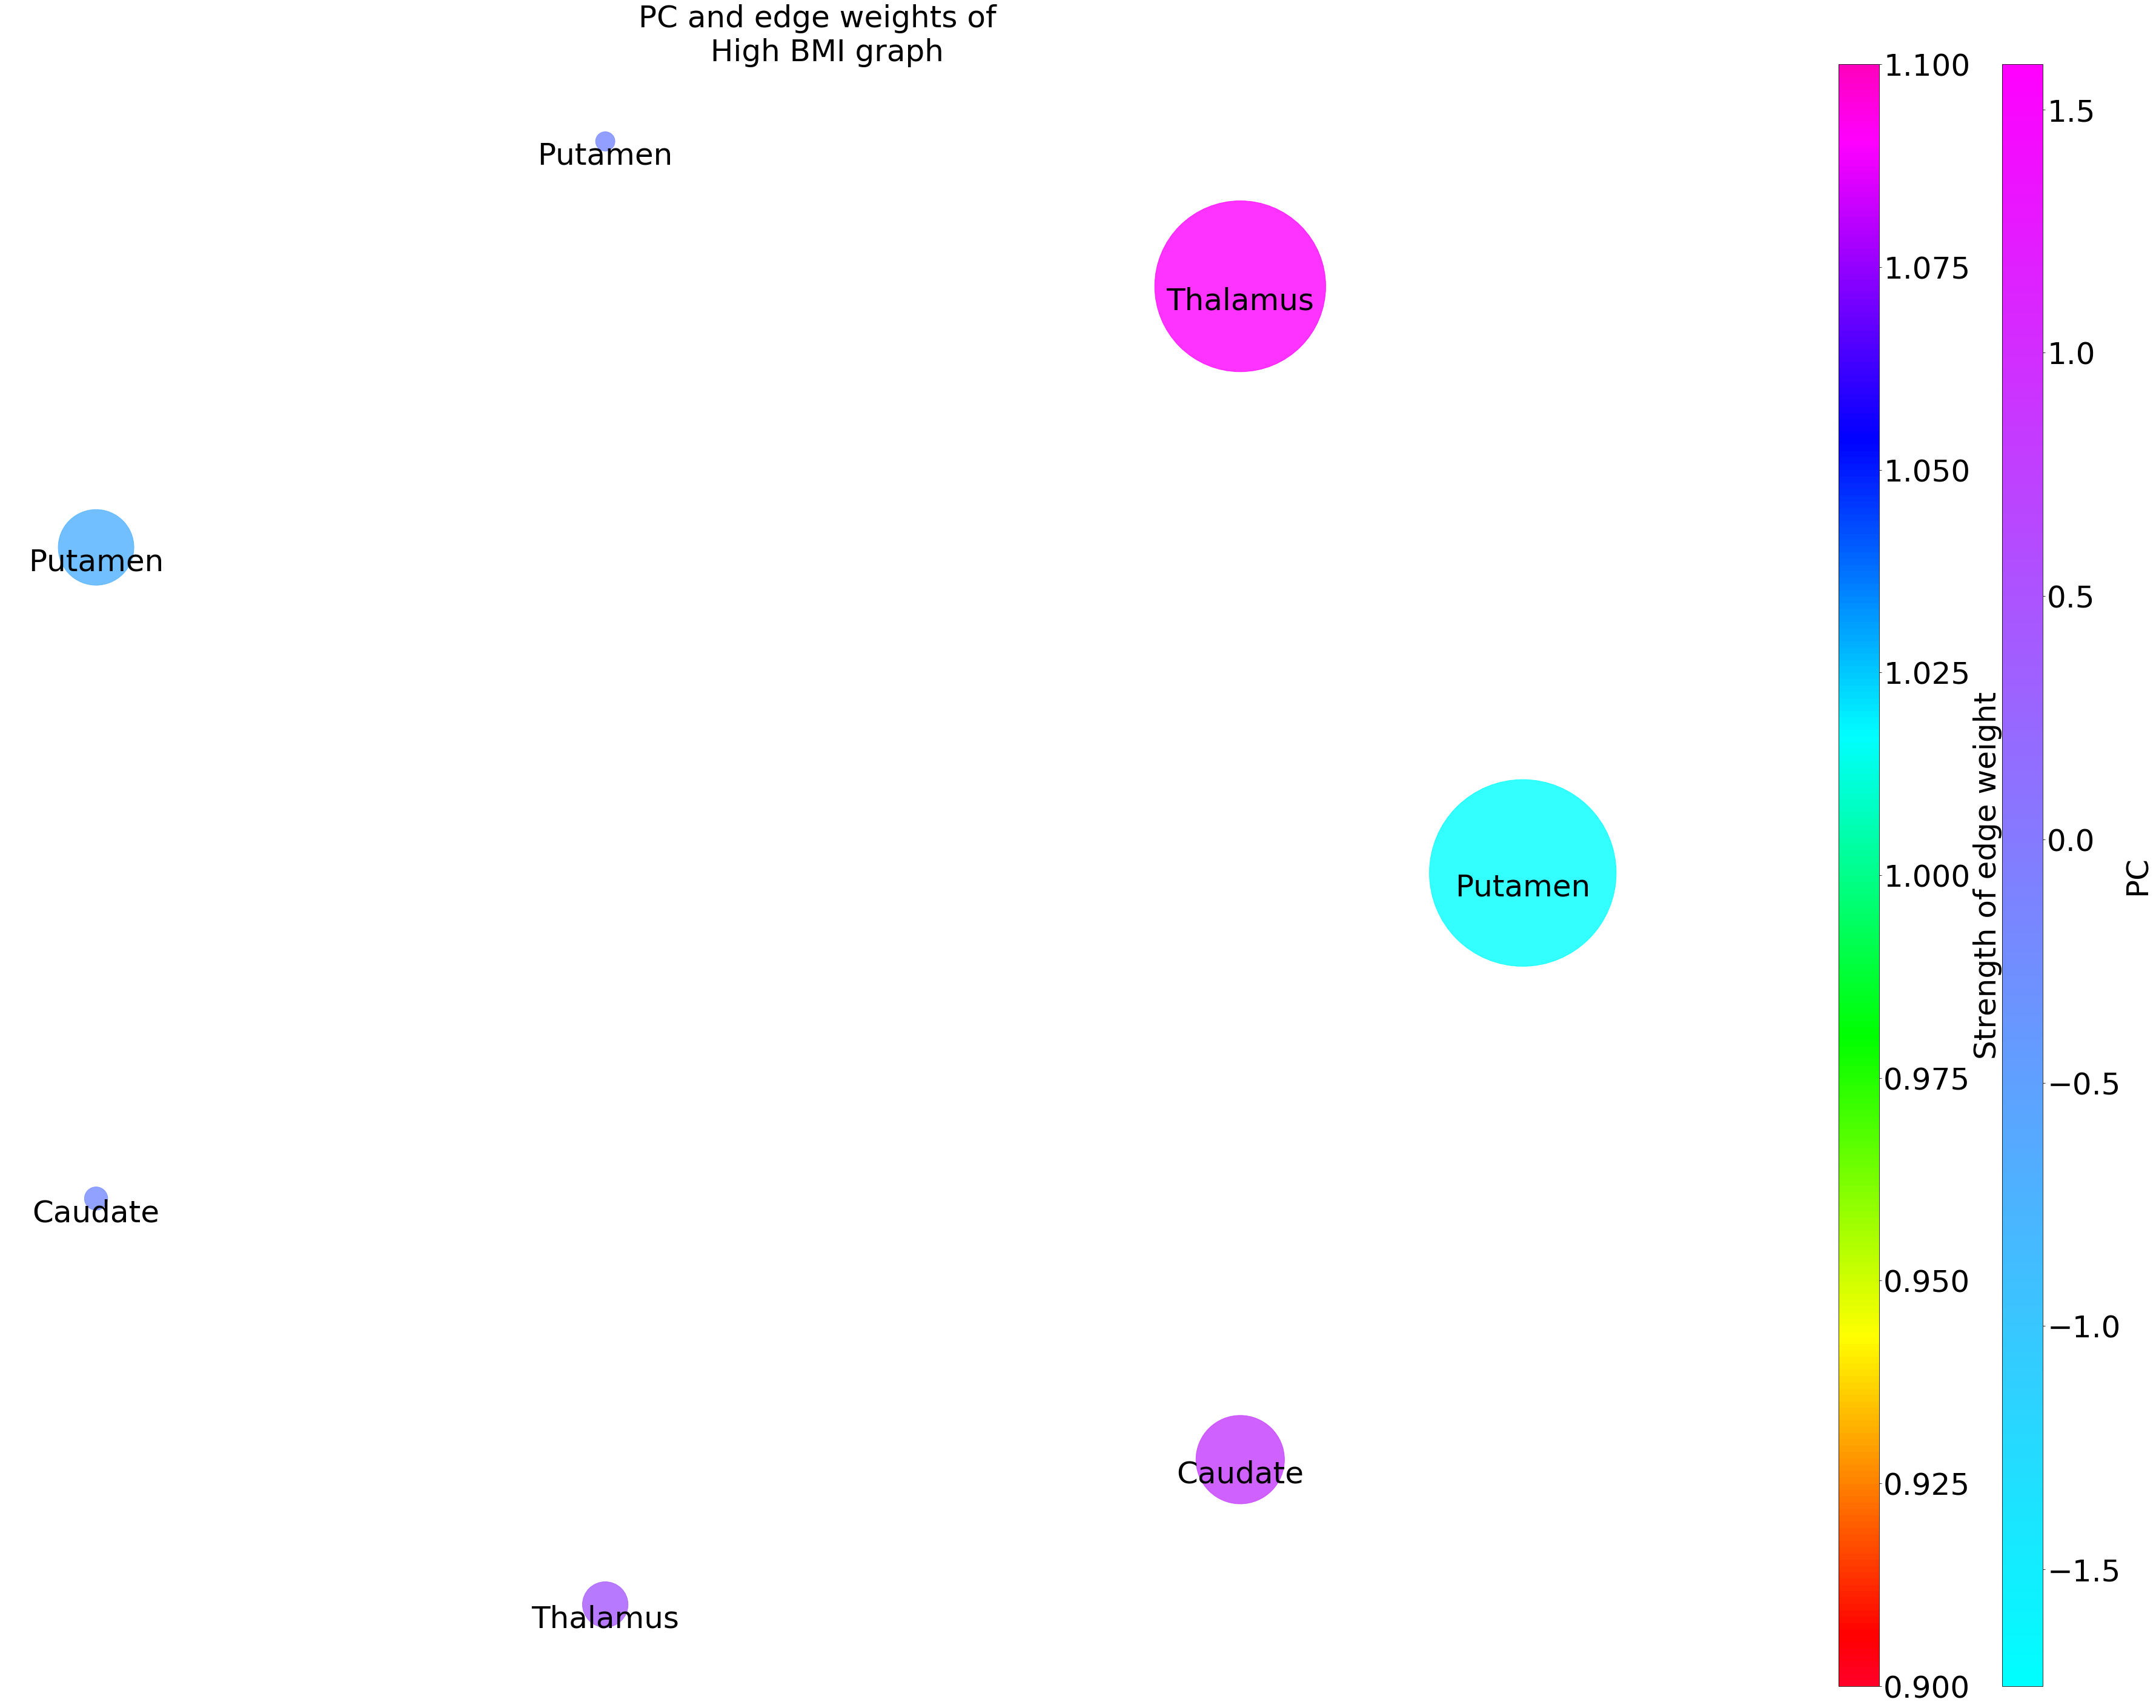

ob
2


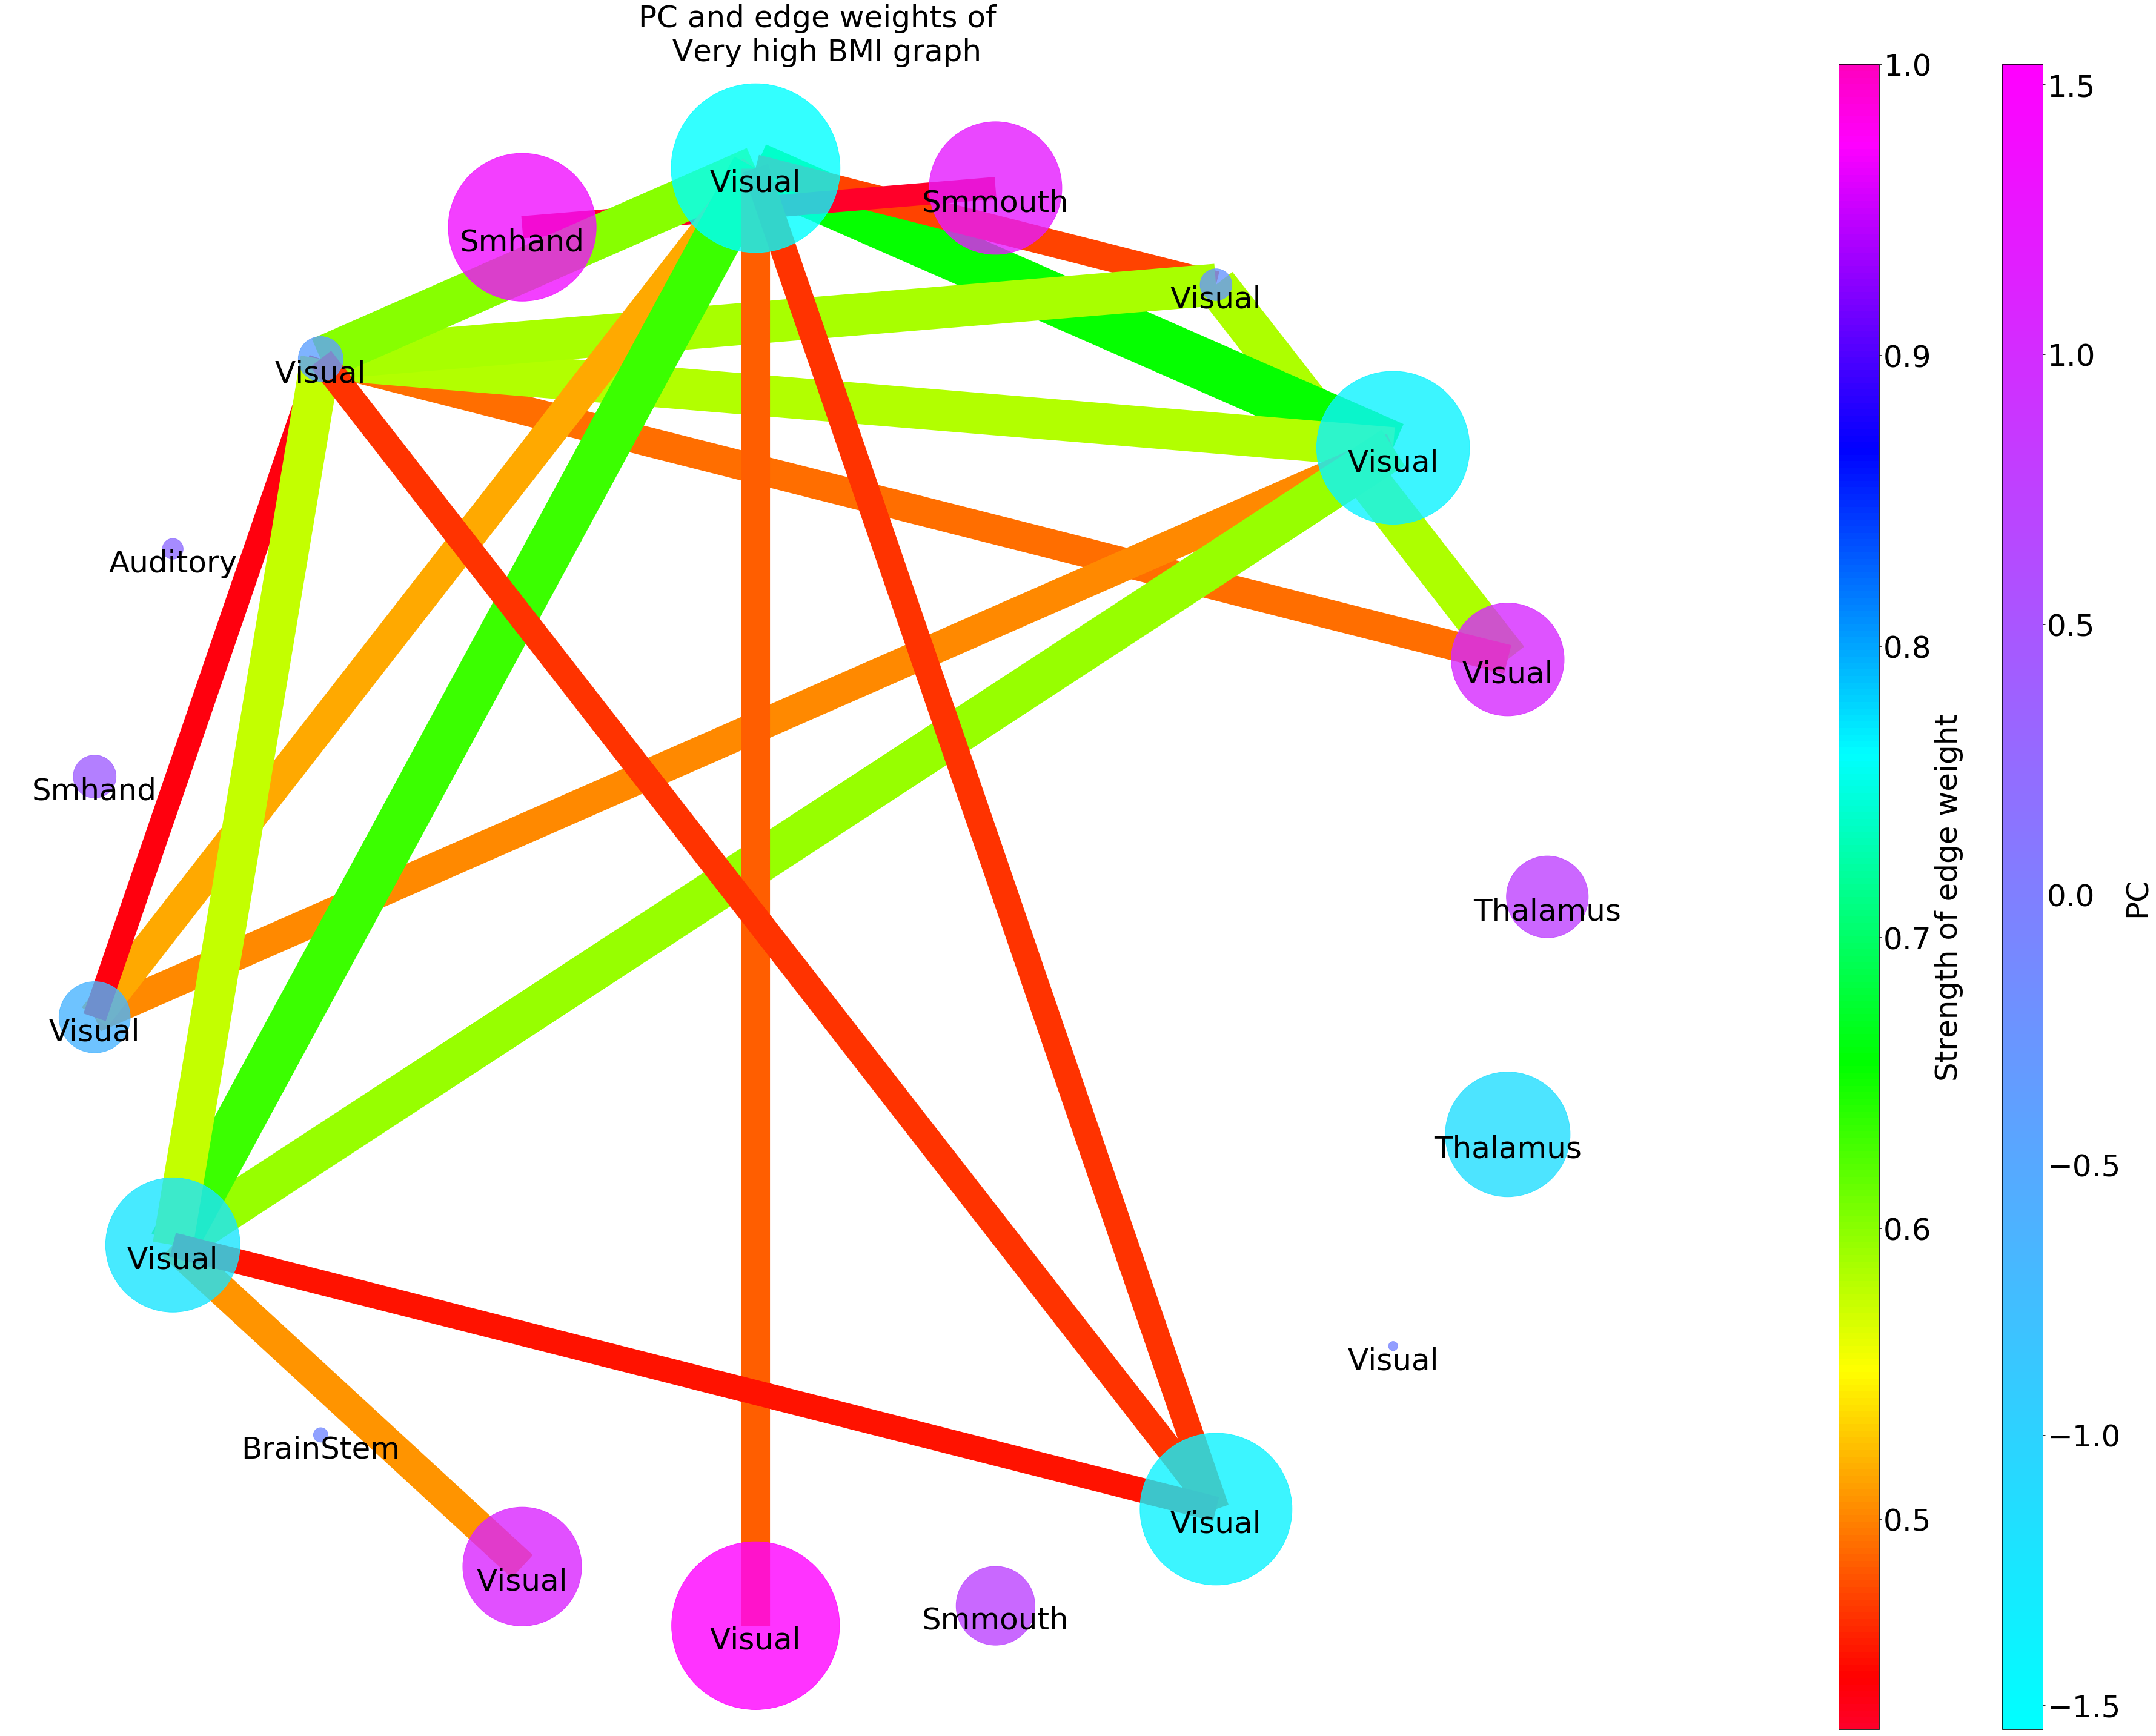

6


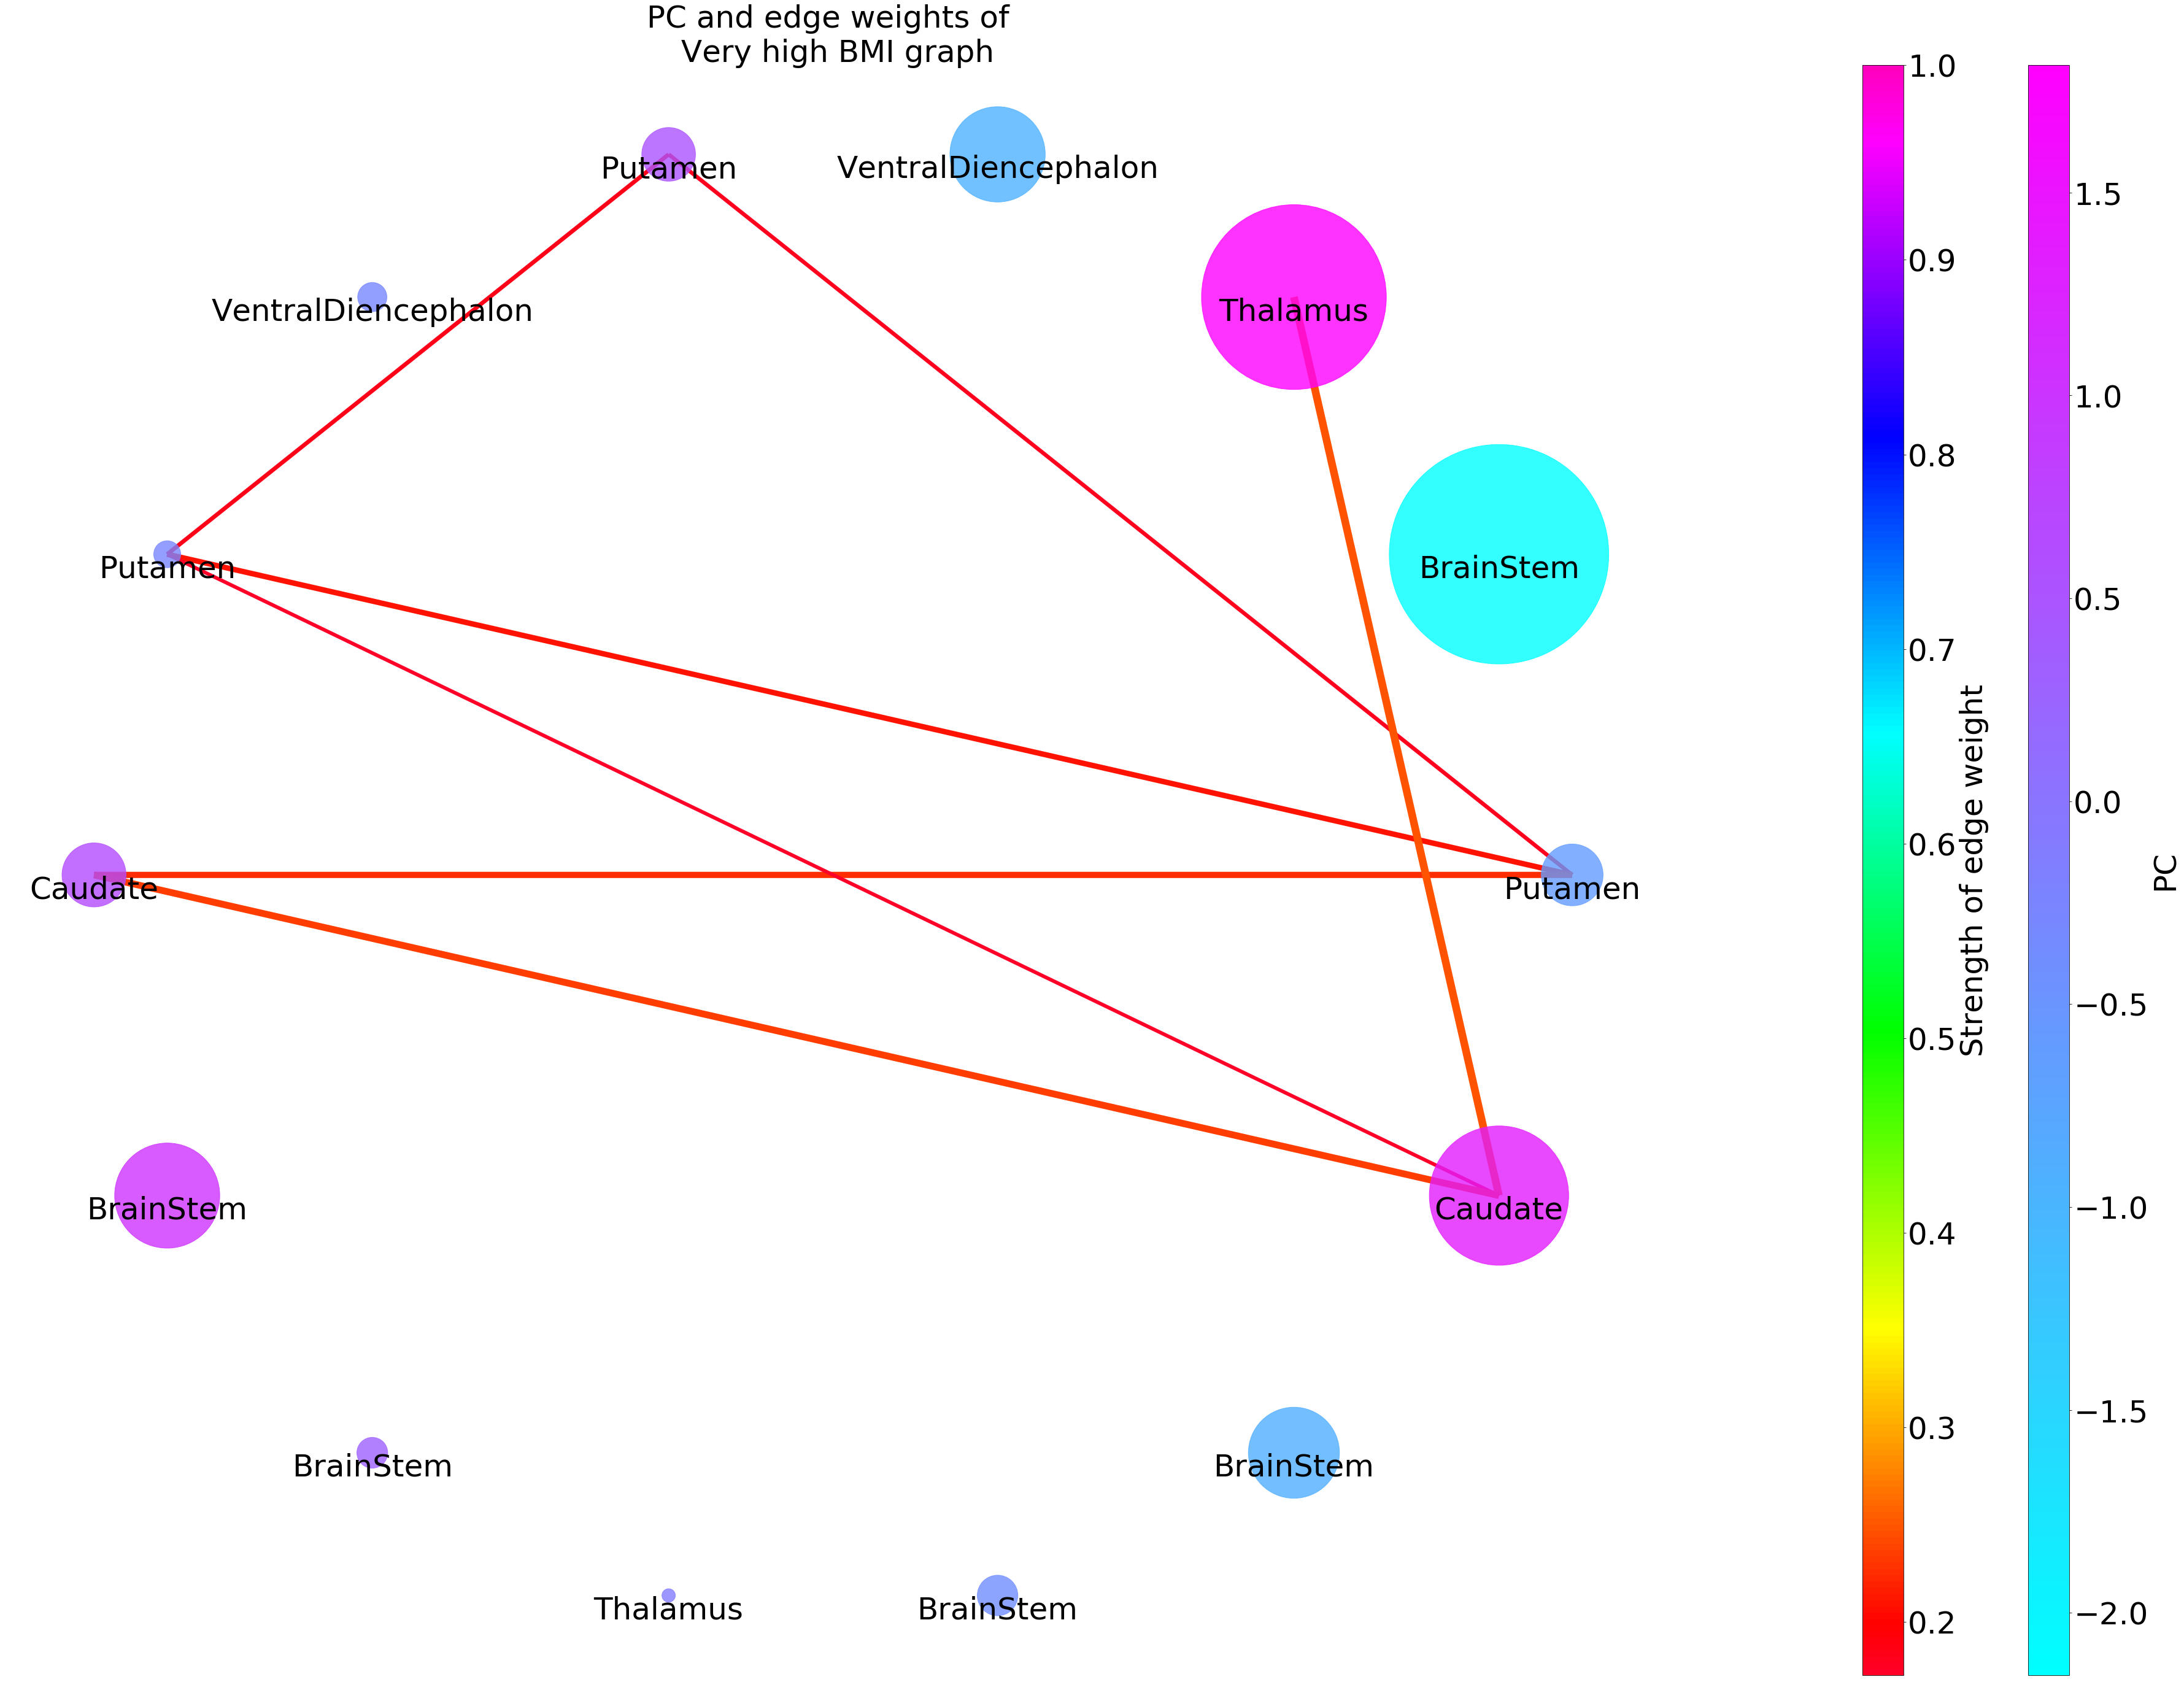

In [87]:
wb_con = {
    'no':{2:{},4:{}},
    'ov': {0:{}, 5:{}},
    'ob':{2:{}, 6:{}}
}

for group, mods in wb_con.items():
    print(group)
    for mod, blank in mods.items():
        print(mod)  
        wb_con[group][mod]=basic_graph(subgraph_dict[group][mod], 50000, 50, 'PC', (75,50), 80, basepath, '%s'%group, '%i'%mod)

## Get the colors for workbench

In [88]:
for group, mods in wb_con.items():
    print(group)
    for mod, data in mods.items():
        print(mod)
        writepath = os.path.join(basepath,'%s_%i.txt'%(group, mod))
        f = open(writepath, "w")
        for key, value in data.items():
            print(key)
            x = value[2]
            print(x)
            f.write('LABEL_%i\n'%(key+1))
            f.write('%i %i %i %i %i\n'%(key+1, x[0], x[1], x[2], x[3]))
        f.close()

no
2
2
[137. 118. 255. 255.]
3
[  0. 255. 255. 255.]
4
[240.  15. 255. 255.]
7
[ 40. 215. 255. 255.]
10
[  4. 251. 255. 255.]
12
[ 29. 226. 255. 255.]
15
[ 60. 195. 255. 255.]
16
[ 14. 241. 255. 255.]
17
[198.  57. 255. 255.]
18
[151. 104. 255. 255.]
19
[ 69. 186. 255. 255.]
20
[ 71. 184. 255. 255.]
22
[ 82. 173. 255. 255.]
26
[ 69. 186. 255. 255.]
27
[ 19. 236. 255. 255.]
29
[ 32. 223. 255. 255.]
30
[255.   0. 255. 255.]
33
[ 84. 171. 255. 255.]
34
[ 64. 191. 255. 255.]
37
[ 74. 181. 255. 255.]
40
[ 72. 183. 255. 255.]
42
[ 73. 182. 255. 255.]
44
[ 18. 237. 255. 255.]
46
[ 50. 205. 255. 255.]
80
[ 90. 165. 255. 255.]
87
[152. 103. 255. 255.]
95
[  5. 250. 255. 255.]
96
[101. 154. 255. 255.]
4
64
[  0. 255. 255. 255.]
66
[180.  75. 255. 255.]
67
[223.  32. 255. 255.]
68
[146. 109. 255. 255.]
75
[ 64. 191. 255. 255.]
14
[211.  44. 255. 255.]
78
[160.  95. 255. 255.]
48
[226.  29. 255. 255.]
86
[102. 153. 255. 255.]
25
[205.  50. 255. 255.]
63
[255.   0. 255. 255.]
62
[107. 148. 255. 255

## Get ICnames

In [89]:
g = subgraph_dict['ob'][6]
new={}
for x,y in nx.get_node_attributes(g, 'labels').items():
        new[x]=[y['IC'], y['area']]

In [90]:
new

{64: ['IC_64', 'Putamen'],
 97: ['IC_97', 'BrainStem'],
 66: ['IC_66', 'Thalamus'],
 98: ['IC_98', 'VentralDiencephalon'],
 68: ['IC_68', 'Putamen'],
 99: ['IC_99', 'VentralDiencephalon'],
 75: ['IC_75', 'Putamen'],
 78: ['IC_78', 'Caudate'],
 79: ['IC_79', 'BrainStem'],
 85: ['IC_85', 'BrainStem'],
 86: ['IC_86', 'Thalamus'],
 94: ['IC_94', 'BrainStem'],
 90: ['IC_90', 'BrainStem'],
 62: ['IC_62', 'Caudate']}

In [93]:
z={}
for group, dat in submod_dict.items():
    print(group)
    z[group]={}
    for module, data in dat.items():
        print(module)
        z[group][module]=data.join(labels)
no=pd.concat(list(z['no'].values()))
ov=pd.concat(list(z['ov'].values()))
ob=pd.concat(list(z['ob'].values()))
total=pd.concat([no,ov,ob])
total.rename(columns={'Unnamed: 2': 'ROI'}, inplace=True)
new_df = total.merge(atlas[['X','Y','Z','ROI']], left_on='ROI', right_on = 'ROI', how='left')
new_df.to_csv(os.path.join(basepath,'tmp','submodule_data.csv'), sep=',')


no
0
1
2
3
4
5
6
7
ov
0
1
2
3
4
5
6
7
ob
0
1
2
3
4
5
6
7
